In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, Layer, GlobalAveragePooling1D, Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
import xgboost as xgb
from sklearn.metrics import  accuracy_score





## Pre-processing data ##

In [ ]:
# load full DataFrame 'data' with appropriate dtypes:
dtype_cols = {'Open': 'float32', 'High': 'float32', 'Low': 'float32',
              'Close': 'float32', 'Label': 'int8'}

# AUD/USD
data_1 = pd.read_csv('M60_aud_usd_labeled.csv', dtype=dtype_cols)

# Define indices for splitting (40% train, 20% validation, 40% test)
total_samples_1 = len(data_1)
train_end_1 = int(total_samples_1 * 0.4)
val_end_1 = train_end_1 + int(total_samples_1 * 0.2)

train_data_1 = data_1.iloc[:train_end_1]
val_data_1 = data_1.iloc[train_end_1:val_end_1]
test_data_1 = data_1.iloc[val_end_1:]


In [ ]:
# Initialize and fit the scaler on the training data (for the features)
scaler = StandardScaler()

# the features to scale:
features = ['Open', 'High', 'Low', 'Close']
scaler.fit(train_data_1[features])

# Transform the features in each split
train_data_scaled_1 = train_data_1.copy()
val_data_scaled_1 = val_data_1.copy()
test_data_scaled_1 = test_data_1.copy()

train_data_scaled_1[features] = scaler.transform(train_data_1[features])
val_data_scaled_1[features] = scaler.transform(val_data_1[features])
test_data_scaled_1[features] = scaler.transform(test_data_1[features])


In [ ]:
def create_sequences_from_split(data, n_steps):
    """
    Create sequences from a split (assumes data is already scaled).
    For each sequence, the label is taken from the last row in the sequence.
    """
    X, y = [], []
    # We loop so that the first sequence will use rows 0 to n_steps-1.
    for i in range(n_steps, len(data) + 1):
        # Extract a sequence of length n_steps.
        sequence = data[features].iloc[i - n_steps:i].values
        X.append(sequence)
        # The label is taken from the last row of the sequence (row index i-1).
        y.append(data['Label'].iloc[i - 1])
    return np.array(X, dtype='float32'), np.array(y)

n_steps = 72  # Sequence length

X_train_1, y_train_1 = create_sequences_from_split(train_data_scaled_1, n_steps)
X_val_1, y_val_1 = create_sequences_from_split(val_data_scaled_1, n_steps)
X_test_1, y_test_1 = create_sequences_from_split(test_data_scaled_1, n_steps)


In [ ]:
print("Shape of X_train:", X_train_1.shape)
print("Shape of y_train:", y_train_1.shape)

print("Shape of X_val:", X_val_1.shape)
print("Shape of y_val:", y_val_1.shape)

print("Shape of X_test:", X_test_1.shape)
print("Shape of y_test:", y_test_1.shape)

Shape of X_train: (26955, 72, 4)
Shape of y_train: (26955,)
Shape of X_val: (13442, 72, 4)
Shape of y_val: (13442,)
Shape of X_test: (26956, 72, 4)
Shape of y_test: (26956,)


In [ ]:
# load full DataFrame 'data' with appropriate dtypes:
dtype_cols = {'Open': 'float32', 'High': 'float32', 'Low': 'float32',
              'Close': 'float32', 'Label': 'int8'}

# EUR/USD
data_2 = pd.read_csv('M60_eur_usd_labeled.csv', dtype=dtype_cols)

# Define indices for splitting (40% train, 20% validation, 40% test)
total_samples_2 = len(data_2)
train_end_2 = int(total_samples_2 * 0.4)
val_end_2 = train_end_2 + int(total_samples_2 * 0.2)

train_data_2 = data_2.iloc[:train_end_2]
val_data_2 = data_2.iloc[train_end_2:val_end_2]
test_data_2 = data_2.iloc[val_end_2:]

In [ ]:
# Initialize and fit the scaler on the training data (for the features)
scaler = StandardScaler()

# the features to scale:
features = ['Open', 'High', 'Low', 'Close']
scaler.fit(train_data_2[features])

# Transform the features in each split
train_data_scaled_2 = train_data_2.copy()
val_data_scaled_2 = val_data_2.copy()
test_data_scaled_2 = test_data_2.copy()

train_data_scaled_2[features] = scaler.transform(train_data_2[features])
val_data_scaled_2[features] = scaler.transform(val_data_2[features])
test_data_scaled_2[features] = scaler.transform(test_data_2[features])


In [ ]:
def create_sequences_from_split(data, n_steps):
    """
    Create sequences from a split (assumes data is already scaled).
    For each sequence, the label is taken from the last row in the sequence.
    """
    X, y = [], []
    # We loop so that the first sequence will use rows 0 to n_steps-1.
    for i in range(n_steps, len(data) + 1):
        # Extract a sequence of length n_steps.
        sequence = data[features].iloc[i - n_steps:i].values
        X.append(sequence)
        # The label is taken from the last row of the sequence (row index i-1).
        y.append(data['Label'].iloc[i - 1])
    return np.array(X, dtype='float32'), np.array(y)

n_steps = 72  # Sequence length

X_train_2, y_train_2 = create_sequences_from_split(train_data_scaled_2, n_steps)
X_val_2, y_val_2 = create_sequences_from_split(val_data_scaled_2, n_steps)
X_test_2, y_test_2 = create_sequences_from_split(test_data_scaled_2, n_steps)


In [ ]:
print("Shape of X_train:", X_train_2.shape)
print("Shape of y_train:", y_train_2.shape)

print("Shape of X_val:", X_val_2.shape)
print("Shape of y_val:", y_val_2.shape)

print("Shape of X_test:", X_test_2.shape)
print("Shape of y_test:", y_test_2.shape)

Shape of X_train: (26958, 72, 4)
Shape of y_train: (26958,)
Shape of X_val: (13443, 72, 4)
Shape of y_val: (13443,)
Shape of X_test: (26959, 72, 4)
Shape of y_test: (26959,)


In [ ]:
# load full DataFrame 'data' with appropriate dtypes:
dtype_cols = {'Open': 'float32', 'High': 'float32', 'Low': 'float32',
              'Close': 'float32', 'Label': 'int8'}

# GBP/USD
data_3 = pd.read_csv('M60_gbp_usd_labeled.csv', dtype=dtype_cols)

# Define indices for splitting (40% train, 20% validation, 40% test)
total_samples_3 = len(data_3)
train_end_3 = int(total_samples_3 * 0.4)
val_end_3 = train_end_3 + int(total_samples_3 * 0.2)

train_data_3 = data_3.iloc[:train_end_3]
val_data_3 = data_3.iloc[train_end_3:val_end_3]
test_data_3 = data_3.iloc[val_end_3:]

In [ ]:
# Initialize and fit the scaler on the training data (for the features)
scaler = StandardScaler()

# the features to scale:
features = ['Open', 'High', 'Low', 'Close']
scaler.fit(train_data_3[features])

# Transform the features in each split
train_data_scaled_3 = train_data_3.copy()
val_data_scaled_3 = val_data_3.copy()
test_data_scaled_3 = test_data_3.copy()

train_data_scaled_3[features] = scaler.transform(train_data_3[features])
val_data_scaled_3[features] = scaler.transform(val_data_3[features])
test_data_scaled_3[features] = scaler.transform(test_data_3[features])


In [ ]:
def create_sequences_from_split(data, n_steps):
    """
    Create sequences from a split (assumes data is already scaled).
    For each sequence, the label is taken from the last row in the sequence.
    """
    X, y = [], []
    # We loop so that the first sequence will use rows 0 to n_steps-1.
    for i in range(n_steps, len(data) + 1):
        # Extract a sequence of length n_steps.
        sequence = data[features].iloc[i - n_steps:i].values
        X.append(sequence)
        # The label is taken from the last row of the sequence (row index i-1).
        y.append(data['Label'].iloc[i - 1])
    return np.array(X, dtype='float32'), np.array(y)

n_steps = 72  # Sequence length

X_train_3, y_train_3 = create_sequences_from_split(train_data_scaled_3, n_steps)
X_val_3, y_val_3 = create_sequences_from_split(val_data_scaled_3, n_steps)
X_test_3, y_test_3 = create_sequences_from_split(test_data_scaled_3, n_steps)


In [ ]:
print("Shape of X_train:", X_train_3.shape)
print("Shape of y_train:", y_train_3.shape)

print("Shape of X_val:", X_val_3.shape)
print("Shape of y_val:", y_val_3.shape)

print("Shape of X_test:", X_test_3.shape)
print("Shape of y_test:", y_test_3.shape)

Shape of X_train: (26711, 72, 4)
Shape of y_train: (26711,)
Shape of X_val: (13320, 72, 4)
Shape of y_val: (13320,)
Shape of X_test: (26712, 72, 4)
Shape of y_test: (26712,)


In [ ]:
# load full DataFrame 'data' with appropriate dtypes:
dtype_cols = {'Open': 'float32', 'High': 'float32', 'Low': 'float32',
              'Close': 'float32', 'Label': 'int8'}

# USD/CAD
data_4 = pd.read_csv('M60_usd_cad_labeled.csv', dtype=dtype_cols)

# Define indices for splitting (40% train, 20% validation, 40% test)
total_samples_4 = len(data_4)
train_end_4 = int(total_samples_4 * 0.4)
val_end_4 = train_end_4 + int(total_samples_4 * 0.2)

train_data_4 = data_4.iloc[:train_end_4]
val_data_4 = data_4.iloc[train_end_4:val_end_4]
test_data_4 = data_4.iloc[val_end_4:]

In [ ]:
# Initialize and fit the scaler on the training data (for the features)
scaler = StandardScaler()

# the features to scale:
features = ['Open', 'High', 'Low', 'Close']
scaler.fit(train_data_4[features])

# Transform the features in each split
train_data_scaled_4 = train_data_4.copy()
val_data_scaled_4 = val_data_4.copy()
test_data_scaled_4 = test_data_4.copy()

train_data_scaled_4[features] = scaler.transform(train_data_4[features])
val_data_scaled_4[features] = scaler.transform(val_data_4[features])
test_data_scaled_4[features] = scaler.transform(test_data_4[features])


In [ ]:
def create_sequences_from_split(data, n_steps):
    """
    Create sequences from a split (assumes data is already scaled).
    For each sequence, the label is taken from the last row in the sequence.
    """
    X, y = [], []
    # We loop so that the first sequence will use rows 0 to n_steps-1.
    for i in range(n_steps, len(data) + 1):
        # Extract a sequence of length n_steps.
        sequence = data[features].iloc[i - n_steps:i].values
        X.append(sequence)
        # The label is taken from the last row of the sequence (row index i-1).
        y.append(data['Label'].iloc[i - 1])
    return np.array(X, dtype='float32'), np.array(y)

n_steps = 72  # Sequence length

X_train_4, y_train_4 = create_sequences_from_split(train_data_scaled_4, n_steps)
X_val_4, y_val_4 = create_sequences_from_split(val_data_scaled_4, n_steps)
X_test_4, y_test_4 = create_sequences_from_split(test_data_scaled_4, n_steps)


In [ ]:
print("Shape of X_train:", X_train_4.shape)
print("Shape of y_train:", y_train_4.shape)

print("Shape of X_val:", X_val_4.shape)
print("Shape of y_val:", y_val_4.shape)

print("Shape of X_test:", X_test_4.shape)
print("Shape of y_test:", y_test_4.shape)

Shape of X_train: (26956, 72, 4)
Shape of y_train: (26956,)
Shape of X_val: (13442, 72, 4)
Shape of y_val: (13442,)
Shape of X_test: (26958, 72, 4)
Shape of y_test: (26958,)


In [ ]:
# load full DataFrame 'data' with appropriate dtypes:
dtype_cols = {'Open': 'float32', 'High': 'float32', 'Low': 'float32',
              'Close': 'float32', 'Label': 'int8'}

# USD/CHF
data_5 = pd.read_csv('M60_usd_chf_labeled.csv', dtype=dtype_cols)

# Define indices for splitting (40% train, 20% validation, 40% test)
total_samples_5 = len(data_5)
train_end_5 = int(total_samples_5 * 0.4)
val_end_5 = train_end_5 + int(total_samples_5 * 0.2)

train_data_5 = data_5.iloc[:train_end_5]
val_data_5 = data_5.iloc[train_end_5:val_end_5]
test_data_5 = data_5.iloc[val_end_5:]

In [ ]:
# Initialize and fit the scaler on the training data (for the features)
scaler = StandardScaler()

# the features to scale:
features = ['Open', 'High', 'Low', 'Close']
scaler.fit(train_data_5[features])

# Transform the features in each split
train_data_scaled_5 = train_data_5.copy()
val_data_scaled_5 = val_data_5.copy()
test_data_scaled_5 = test_data_5.copy()

train_data_scaled_5[features] = scaler.transform(train_data_5[features])
val_data_scaled_5[features] = scaler.transform(val_data_5[features])
test_data_scaled_5[features] = scaler.transform(test_data_5[features])


In [ ]:
def create_sequences_from_split(data, n_steps):
    """
    Create sequences from a split (assumes data is already scaled).
    For each sequence, the label is taken from the last row in the sequence.
    """
    X, y = [], []
    # We loop so that the first sequence will use rows 0 to n_steps-1.
    for i in range(n_steps, len(data) + 1):
        # Extract a sequence of length n_steps.
        sequence = data[features].iloc[i - n_steps:i].values
        X.append(sequence)
        # The label is taken from the last row of the sequence (row index i-1).
        y.append(data['Label'].iloc[i - 1])
    return np.array(X, dtype='float32'), np.array(y)

n_steps = 72  # Sequence length

X_train_5, y_train_5 = create_sequences_from_split(train_data_scaled_5, n_steps)
X_val_5, y_val_5 = create_sequences_from_split(val_data_scaled_5, n_steps)
X_test_5, y_test_5 = create_sequences_from_split(test_data_scaled_5, n_steps)


In [ ]:
print("Shape of X_train:", X_train_5.shape)
print("Shape of y_train:", y_train_5.shape)

print("Shape of X_val:", X_val_5.shape)
print("Shape of y_val:", y_val_5.shape)

print("Shape of X_test:", X_test_5.shape)
print("Shape of y_test:", y_test_5.shape)

Shape of X_train: (26709, 72, 4)
Shape of y_train: (26709,)
Shape of X_val: (13319, 72, 4)
Shape of y_val: (13319,)
Shape of X_test: (26709, 72, 4)
Shape of y_test: (26709,)


In [ ]:
# load full DataFrame 'data' with appropriate dtypes:
dtype_cols = {'Open': 'float32', 'High': 'float32', 'Low': 'float32',
              'Close': 'float32', 'Label': 'int8'}

# USD/JPY
data_6 = pd.read_csv('M60_usd_jpy_labeled.csv', dtype=dtype_cols)

# Define indices for splitting (40% train, 20% validation, 40% test)
total_samples_6 = len(data_6)
train_end_6 = int(total_samples_6 * 0.4)
val_end_6 = train_end_6 + int(total_samples_6 * 0.2)

train_data_6 = data_6.iloc[:train_end_6]
val_data_6 = data_6.iloc[train_end_6:val_end_6]
test_data_6 = data_6.iloc[val_end_6:]

In [ ]:
# Initialize and fit the scaler on the training data (for the features)
scaler = StandardScaler()

# the features to scale:
features = ['Open', 'High', 'Low', 'Close']
scaler.fit(train_data_6[features])

# Transform the features in each split
train_data_scaled_6 = train_data_6.copy()
val_data_scaled_6 = val_data_6.copy()
test_data_scaled_6 = test_data_6.copy()

train_data_scaled_6[features] = scaler.transform(train_data_6[features])
val_data_scaled_6[features] = scaler.transform(val_data_6[features])
test_data_scaled_6[features] = scaler.transform(test_data_6[features])


In [ ]:
def create_sequences_from_split(data, n_steps):
    """
    Create sequences from a split (assumes data is already scaled).
    For each sequence, the label is taken from the last row in the sequence.
    """
    X, y = [], []
    # We loop so that the first sequence will use rows 0 to n_steps-1.
    for i in range(n_steps, len(data) + 1):
        # Extract a sequence of length n_steps.
        sequence = data[features].iloc[i - n_steps:i].values
        X.append(sequence)
        # The label is taken from the last row of the sequence (row index i-1).
        y.append(data['Label'].iloc[i - 1])
    return np.array(X, dtype='float32'), np.array(y)

n_steps = 72  # Sequence length

X_train_6, y_train_6 = create_sequences_from_split(train_data_scaled_6, n_steps)
X_val_6, y_val_6 = create_sequences_from_split(val_data_scaled_6, n_steps)
X_test_6, y_test_6 = create_sequences_from_split(test_data_scaled_6, n_steps)


In [ ]:
print("Shape of X_train:", X_train_6.shape)
print("Shape of y_train:", y_train_6.shape)

print("Shape of X_val:", X_val_6.shape)
print("Shape of y_val:", y_val_6.shape)

print("Shape of X_test:", X_test_6.shape)
print("Shape of y_test:", y_test_6.shape)

Shape of X_train: (26957, 72, 4)
Shape of y_train: (26957,)
Shape of X_val: (13443, 72, 4)
Shape of y_val: (13443,)
Shape of X_test: (26957, 72, 4)
Shape of y_test: (26957,)


In [ ]:
# combine data
X_train_combined = np.concatenate([X_train_1, X_train_2, X_train_3, X_train_4, X_train_5, X_train_6])
y_train_combined = np.concatenate([y_train_1, y_train_2, y_train_3, y_train_4, y_train_5, y_train_6])

X_val_combined = np.concatenate([X_val_1, X_val_2, X_val_3, X_val_4, X_val_5, X_val_6])
y_val_combined = np.concatenate([y_val_1, y_val_2, y_val_3, y_val_4, y_val_5, y_val_6])

X_test_combined = np.concatenate([X_test_1, X_test_2, X_test_3, X_test_4, X_test_5, X_test_6])
y_test_combined = np.concatenate([y_test_1, y_test_2, y_test_3, y_test_4, y_test_5, y_test_6])


In [ ]:
print("Shape of X_train_combined:", X_train_combined.shape)
print("Shape of y_train_combined:", y_train_combined.shape)

print("Shape of X_val_combined:", X_val_combined.shape)
print("Shape of y_val_combined:", y_val_combined.shape)

print("Shape of X_test_combined:", X_test_combined.shape)
print("Shape of y_test_combined:", y_test_combined.shape)

Shape of X_train_combined: (161246, 72, 4)
Shape of y_train_combined: (161246,)
Shape of X_val_combined: (80409, 72, 4)
Shape of y_val_combined: (80409,)
Shape of X_test_combined: (161251, 72, 4)
Shape of y_test_combined: (161251,)


## Model 1 ##

#Training#

Local Positional Encoding

Focal Loss function



In [ ]:
# Focal Loss Function
@tf.keras.utils.register_keras_serializable(package="CustomLoss")
class FocalLoss(tf.keras.losses.Loss):
    def __init__(self, gamma=2.0, alpha=None, **kwargs):
        super(FocalLoss, self).__init__(**kwargs)
        self.gamma = gamma
        if alpha is None:
            alpha = [1.0]
        # Convert alpha to a constant tensor.
        self.alpha = tf.constant(alpha, dtype=tf.float32)

    def call(self, y_true, y_pred):
        # Ensure y_true is integer and remove extra dimensions.
        y_true = tf.cast(tf.squeeze(y_true), tf.int32)
        num_classes = tf.shape(y_pred)[-1]
        y_true_one_hot = tf.one_hot(y_true, depth=num_classes)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
        p_t = tf.reduce_sum(y_true_one_hot * y_pred, axis=-1)
        alpha_factor = tf.reduce_sum(y_true_one_hot * self.alpha, axis=-1)
        ce_loss = -tf.math.log(p_t)
        focal_weight = alpha_factor * tf.pow(1 - p_t, self.gamma)
        loss = focal_weight * ce_loss
        loss = tf.reshape(loss, [-1])
        return loss

    def get_config(self):
        config = super(FocalLoss, self).get_config()
        # Save alpha as a list so it can be re-created during deserialization.
        config.update({
            "gamma": self.gamma,
            "alpha": self.alpha.numpy().tolist()
        })
        return config


In [ ]:
# =============================================================================
# Local Positional Encoding Layer
# =============================================================================
class LocalPositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        self.seq_length = kwargs.pop('seq_length')
        self.d_model = kwargs.pop('d_model')
        self.kernel_size = kwargs.pop('kernel_size', 7)
        super(LocalPositionalEncoding, self).__init__(**kwargs)
        self.conv = tf.keras.layers.Conv1D(
            filters=self.d_model,
            kernel_size=self.kernel_size,
            padding='same',
            activation='relu'
        )

    def build(self, input_shape):
        self.pos_embedding = self.add_weight(
            name="pos_embedding",
            shape=(self.seq_length, self.d_model),
            initializer=tf.keras.initializers.RandomNormal(stddev=0.06),
            trainable=True
        )
        super(LocalPositionalEncoding, self).build(input_shape)

    def call(self, inputs):
        pos_emb_expanded = tf.expand_dims(self.pos_embedding, axis=0)
        local_pos = self.conv(pos_emb_expanded)
        return inputs + local_pos

    def get_config(self):
        config = super(LocalPositionalEncoding, self).get_config()
        config.update({
            'seq_length': self.seq_length,
            'd_model': self.d_model,
            'kernel_size': self.kernel_size
        })
        return config


# =============================================================================
# Transformer Encoder Layer
# =============================================================================
def transformer_encoder(inputs, num_heads, ff_dim):
    # Pre-norm: normalize before the attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    # Multi-head self-attention with residual connection
    attn_output, attention_weights = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads,
        key_dim=inputs.shape[-1]
    )(x, x, return_attention_scores=True)
    attn_output = Dropout(0.1)(attn_output)
    x = attn_output + inputs

    # Simplified Feed-forward network with a residual connection
    y = LayerNormalization(epsilon=1e-6)(x)
    y = Dense(ff_dim, activation="relu", kernel_initializer='he_normal')(y)
    y = Dense(inputs.shape[-1], kernel_initializer='he_normal')(y)
    y = Dropout(0.2)(y)
    return x + y, attention_weights

# =============================================================================
# Build Model
# =============================================================================
def build_train_model(seq_length, feature_dim, num_heads, ff_dim, num_classes, num_layers=2):
    """
    Build a transformer model for time series classification.
    Inputs: historical prices (e.g., OHLC)
    Output: softmax over 3 classes (0: no move, 1: up, 2: down)
    """
    inputs = Input(shape=(seq_length, feature_dim))

    # Introduce non-linearity and expand feature dimension with Dense layers.
    x = Dense(feature_dim * 8, activation="relu", kernel_initializer='he_normal')(inputs)
    x = Dense(feature_dim * 16, activation="relu", kernel_initializer='he_normal')(x)

    # Incorporate local positional encoding
    x = LocalPositionalEncoding(seq_length=seq_length, d_model=feature_dim * 16, kernel_size=3)(x)


    # Stack transformer encoder layers
    for _ in range(num_layers):
        x, _ = transformer_encoder(x, num_heads, ff_dim)

    # Global average pooling to produce a fixed-size output vector.
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(num_classes, activation="softmax", kernel_initializer='he_normal')(x)
    model = Model(inputs, outputs)
    return model

# =============================================================================
# Build, compile, and summarize the model
# =============================================================================
train_model = build_train_model(
    seq_length=72,
    feature_dim=4,     # For OHLC data
    num_heads=4,
    ff_dim=256,
    num_classes=3,
    num_layers=6
)

train_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=FocalLoss(gamma=2.0, alpha=[0.22, 0.39, 0.39]),
    metrics=["accuracy"]
)

train_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 72, 4)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 72, 32)         │            160 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 72, 64)         │          2,112 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ local_positional_encoding │ (None, 72, 64)         │         16,960 │ dense_1[0][0]          │
│ (LocalPositionalEncoding) │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 72, 64)         │            128 │ local_positional_enco… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ [(None, 72, 64),       │         66,368 │ layer_normalization[0… │
│ (MultiHeadAttention)      │ (None, 4, 72, 72)]     │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 72, 64)         │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 72, 64)         │              0 │ dropout_1[0][0],       │
│                           │                        │                │ local_positional_enco… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 72, 64)         │            128 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 72, 256)        │         16,640 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 72, 64)         │         16,448 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 72, 64)         │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 72, 64)         │              0 │ add[0][0],             │
│                           │                        │                │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 72, 64)         │            128 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ [(None, 72, 64),       │         66,368 │ layer_normalization_2… │
│ (MultiHeadAttention)      │ (None, 4, 72, 72)]     │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)  

 Total params: 617,699 (2.36 MB)

 Trainable params: 617,699 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = train_model.fit(
    X_train_combined,
    y_train_combined,
    validation_data=(X_val_combined, y_val_combined),
    epochs=50,
    batch_size=32,

)

Epoch 1/50
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 110s 14ms/step - accuracy: 0.7253 - loss: 0.1227 - val_accuracy: 0.8578 - val_loss: 0.0800
Epoch 2/50
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 48s 10ms/step - accuracy: 0.7733 - loss: 0.0988 - val_accuracy: 0.8538 - val_loss: 0.0784
Epoch 3/50
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 48s 10ms/step - accuracy: 0.7727 - loss: 0.0982 - val_accuracy: 0.8578 - val_loss: 0.0775
Epoch 4/50
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 50s 10ms/step - accuracy: 0.7747 - loss: 0.0973 - val_accuracy: 0.8578 - val_loss: 0.0785
Epoch 5/50
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 52s 10ms/step - accuracy: 0.7737 - loss: 0.0973 - val_accuracy: 0.8578 - val_loss: 0.0760
Epoch 6/50
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 51s 10ms/step - accuracy: 0.7745 - loss: 0.0967 - val_accuracy: 0.8578 - val_loss: 0.0748
Epoch 7/50
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 50s 10ms/step - accuracy: 0.7734 - loss: 0.0969 - val_accuracy: 0.8569 - val_loss: 0.0782
Epoch 8/50
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 48s 10ms/step - accuracy: 0.7727 

# Saving and Loading the model#

In [ ]:
# Save the model
train_model.save('/content/drive/MyDrive/MSc-M60-Model-33.keras')


In [ ]:
# Provide the custom objects that the model needs.
custom_objects = {
    'LocalPositionalEncoding': LocalPositionalEncoding,
    'focal_loss': FocalLoss
}

# Load the model
model = load_model('/content/drive/MyDrive/MSc-M60-Model-33.keras', custom_objects=custom_objects)


#Evaluating the model#

In [ ]:
model = train_model

In [ ]:
# Test Accuracy
test_loss, test_acc = model.evaluate(X_test_combined, y_test_combined)
print(f"Test Accuracy: {test_acc}")

5040/5040 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 0.7299 - loss: 0.1080
Test Accuracy: 0.6926282644271851


In [ ]:
# Getting probabilities on test set
probabilities = model.predict(X_test_combined)

# Convert probabilistic predictions to class labels
predictions = np.argmax(probabilities, axis=1)


5040/5040 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step


In [ ]:
# Class predictions
unique_predictions, prediction_counts = np.unique(predictions, return_counts=True)
prediction_distribution = dict(zip(unique_predictions, prediction_counts))
print(prediction_distribution)

{0: 128877, 1: 10944, 2: 21430}


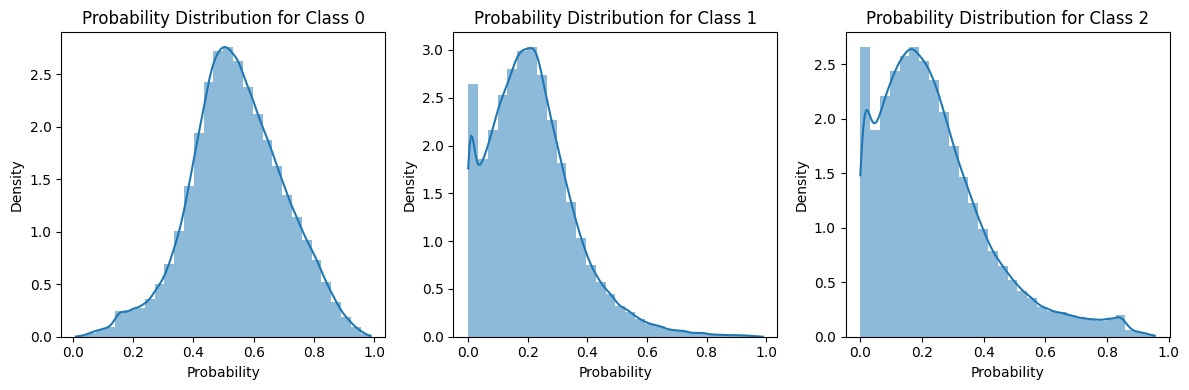

In [ ]:
# Probability distribution of class predictions
class_labels = ['Class 0', 'Class 1', 'Class 2']  # Names of the classes

plt.figure(figsize=(12, 4))
for i, class_label in enumerate(class_labels):
    plt.subplot(1, 3, i + 1)  # Create a subplot for each class
    sns.histplot(probabilities[:, i], bins=30, kde=True, stat="density", linewidth=0)
    plt.title(f'Probability Distribution for {class_label}')
    plt.xlabel('Probability')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()


In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_combined, predictions)

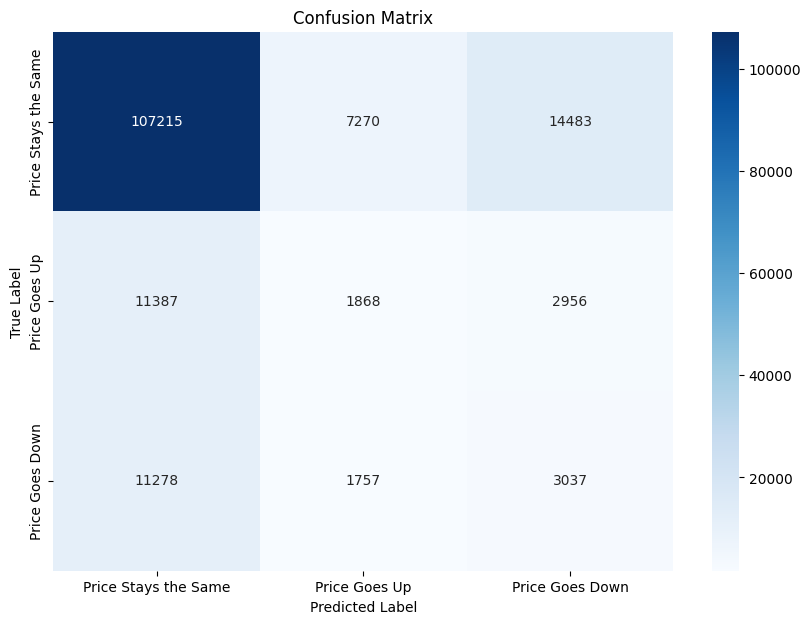

In [ ]:
# Plot confusion Matrix

classes = ["Price Stays the Same", "Price Goes Up", "Price Goes Down"]
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Ploting Results ##

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']


accuracy = history.history.get('accuracy')
val_accuracy = history.history.get('val_accuracy')

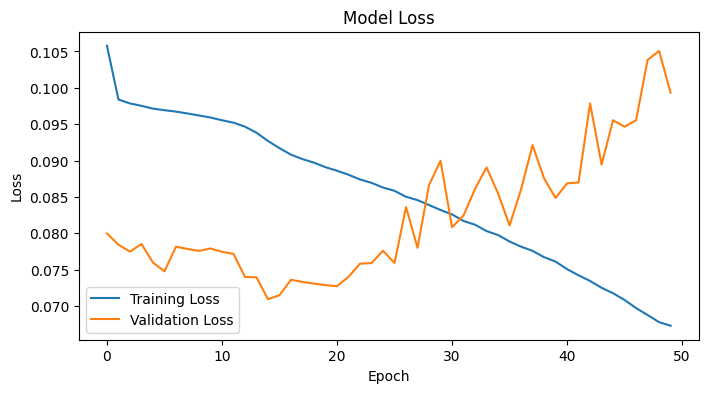

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

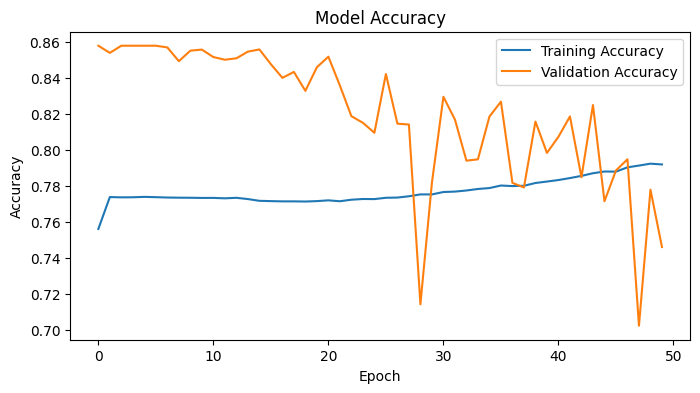

In [ ]:
if accuracy is not None:
    plt.figure(figsize=(8, 4))
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

## Model 2 ##

Local Positional encoding

Focal Loss



In [ ]:
# Focal Loss Function
@tf.keras.utils.register_keras_serializable(package="CustomLoss")
class FocalLoss(tf.keras.losses.Loss):
    def __init__(self, gamma=2.0, alpha=None, **kwargs):
        super(FocalLoss, self).__init__(**kwargs)
        self.gamma = gamma
        if alpha is None:
            alpha = [1.0]
        # Convert alpha to a constant tensor.
        self.alpha = tf.constant(alpha, dtype=tf.float32)

    def call(self, y_true, y_pred):
        # Ensure y_true is integer and remove extra dimensions.
        y_true = tf.cast(tf.squeeze(y_true), tf.int32)
        num_classes = tf.shape(y_pred)[-1]
        y_true_one_hot = tf.one_hot(y_true, depth=num_classes)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
        p_t = tf.reduce_sum(y_true_one_hot * y_pred, axis=-1)
        alpha_factor = tf.reduce_sum(y_true_one_hot * self.alpha, axis=-1)
        ce_loss = -tf.math.log(p_t)
        focal_weight = alpha_factor * tf.pow(1 - p_t, self.gamma)
        loss = focal_weight * ce_loss
        loss = tf.reshape(loss, [-1])
        return loss

    def get_config(self):
        config = super(FocalLoss, self).get_config()
        # Save alpha as a list so it can be re-created during deserialization.
        config.update({
            "gamma": self.gamma,
            "alpha": self.alpha.numpy().tolist()
        })
        return config


In [ ]:
# =============================================================================
# Local Positional Encoding Layer
# =============================================================================
class LocalPositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        self.seq_length = kwargs.pop('seq_length')
        self.d_model = kwargs.pop('d_model')
        self.kernel_size = kwargs.pop('kernel_size', 7)
        super(LocalPositionalEncoding, self).__init__(**kwargs)
        self.conv = tf.keras.layers.Conv1D(
            filters=self.d_model,
            kernel_size=self.kernel_size,
            padding='same',
            activation='relu'
        )

    def build(self, input_shape):
        self.pos_embedding = self.add_weight(
            name="pos_embedding",
            shape=(self.seq_length, self.d_model),
            initializer=tf.keras.initializers.RandomNormal(stddev=0.06),
            trainable=True
        )
        super(LocalPositionalEncoding, self).build(input_shape)

    def call(self, inputs):
        pos_emb_expanded = tf.expand_dims(self.pos_embedding, axis=0)
        local_pos = self.conv(pos_emb_expanded)
        return inputs + local_pos

    def get_config(self):
        config = super(LocalPositionalEncoding, self).get_config()
        config.update({
            'seq_length': self.seq_length,
            'd_model': self.d_model,
            'kernel_size': self.kernel_size
        })
        return config


# =============================================================================
# Transformer Encoder Layer (unchanged, but with some pre-norm improvements)
# =============================================================================
def transformer_encoder(inputs, num_heads, ff_dim):
    # Pre-norm: normalize before the attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    # Multi-head self-attention with residual connection
    attn_output, attention_weights = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads,
        key_dim=inputs.shape[-1]
    )(x, x, return_attention_scores=True)
    attn_output = Dropout(0.1)(attn_output)
    x = attn_output + inputs

    # Simplified Feed-forward network with a residual connection
    y = LayerNormalization(epsilon=1e-6)(x)
    y = Dense(ff_dim, activation="relu", kernel_initializer='he_normal')(y)
    y = Dense(inputs.shape[-1], kernel_initializer='he_normal')(y)
    y = Dropout(0.2)(y)
    return x + y, attention_weights

# =============================================================================
# Build Model
# =============================================================================
def build_train_model(seq_length, feature_dim, num_heads, ff_dim, num_classes, num_layers=2):
    """
    Build a transformer model for time series classification.
    Inputs: historical prices (e.g., OHLC)
    Output: softmax over 3 classes (0: no move, 1: up, 2: down)
    """
    inputs = Input(shape=(seq_length, feature_dim))

    # Introduce non-linearity and expand feature dimension with Dense layers.
    x = Dense(feature_dim * 8, activation="relu", kernel_initializer='he_normal')(inputs)
    x = Dense(feature_dim * 16, activation="relu", kernel_initializer='he_normal')(x)

    # Incorporate local positional encoding
    x = LocalPositionalEncoding(seq_length=seq_length, d_model=feature_dim * 16, kernel_size=3)(x)


    # Stack transformer encoder layers
    for _ in range(num_layers):
        x, _ = transformer_encoder(x, num_heads, ff_dim)

    # Global average pooling to produce a fixed-size output vector.
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(num_classes, activation="softmax", kernel_initializer='he_normal')(x)
    model = Model(inputs, outputs)
    return model

# =============================================================================
# Build, compile, and summarize the model
# =============================================================================
train_model = build_train_model(
    seq_length=72,
    feature_dim=4,     # For OHLC data
    num_heads=4,
    ff_dim=256,
    num_classes=3,
    num_layers=6
)

train_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=FocalLoss(gamma=2.0, alpha=[0.28, 0.36, 0.36]),
    metrics=["accuracy"]
)

train_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 72, 4)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 72, 32)         │            160 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 72, 64)         │          2,112 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ local_positional_encoding │ (None, 72, 64)         │         16,960 │ dense_1[0][0]          │
│ (LocalPositionalEncoding) │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 72, 64)         │            128 │ local_positional_enco… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ [(None, 72, 64),       │         66,368 │ layer_normalization[0… │
│ (MultiHeadAttention)      │ (None, 4, 72, 72)]     │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 72, 64)         │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 72, 64)         │              0 │ dropout_1[0][0],       │
│                           │                        │                │ local_positional_enco… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 72, 64)         │            128 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 72, 256)        │         16,640 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 72, 64)         │         16,448 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 72, 64)         │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 72, 64)         │              0 │ add[0][0],             │
│                           │                        │                │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 72, 64)         │            128 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ [(None, 72, 64),       │         66,368 │ layer_normalization_2… │
│ (MultiHeadAttention)      │ (None, 4, 72, 72)]     │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)  

 Total params: 617,699 (2.36 MB)

 Trainable params: 617,699 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model with the early stopping callback
history = train_model.fit(
    X_train_combined,
    y_train_combined,
    validation_data=(X_val_combined, y_val_combined),
    epochs=60,
    batch_size=32,

)

Epoch 1/60
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 119s 16ms/step - accuracy: 0.7438 - loss: 0.4180 - val_accuracy: 0.8577 - val_loss: 0.0919
Epoch 2/60
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 52s 10ms/step - accuracy: 0.7731 - loss: 0.1004 - val_accuracy: 0.8579 - val_loss: 0.0927
Epoch 3/60
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 52s 10ms/step - accuracy: 0.7735 - loss: 0.0992 - val_accuracy: 0.8579 - val_loss: 0.0793
Epoch 4/60
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 52s 10ms/step - accuracy: 0.7746 - loss: 0.0984 - val_accuracy: 0.8572 - val_loss: 0.0792
Epoch 5/60
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 52s 10ms/step - accuracy: 0.7741 - loss: 0.0982 - val_accuracy: 0.8579 - val_loss: 0.0751
Epoch 6/60
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 51s 10ms/step - accuracy: 0.7740 - loss: 0.0979 - val_accuracy: 0.8576 - val_loss: 0.0762
Epoch 7/60
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 50s 10ms/step - accuracy: 0.7733 - loss: 0.0978 - val_accuracy: 0.8432 - val_loss: 0.0879
Epoch 8/60
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 50s 10ms/step - accuracy: 0.7735 

In [ ]:
# Save the model
train_model.save('/content/drive/MyDrive/MSc-M60-Model-2.keras')


In [ ]:
# Provide the custom objects that the model needs.
custom_objects = {
    'LocalPositionalEncoding': LocalPositionalEncoding,
    'focal_loss': FocalLoss
}

# Load the model
model = load_model('/content/drive/MyDrive/MSc-M60-Model-2.keras', custom_objects=custom_objects)


## Evaluating the model ##

In [ ]:
model = train_model

In [ ]:
# Test Accuracy
test_loss, test_acc = model.evaluate(X_test_combined, y_test_combined)
print(f"Test Accuracy: {test_acc}")

5040/5040 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.7532 - loss: 0.1258
Test Accuracy: 0.73748379945755


In [ ]:
# Getting probabilities on test set
probabilities = train_model.predict(X_test_combined)

# Convert probabilistic predictions to class labels
predictions = np.argmax(probabilities, axis=1)

5040/5040 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step


In [ ]:
# Class predictions
unique_predictions, prediction_counts = np.unique(predictions, return_counts=True)
prediction_distribution = dict(zip(unique_predictions, prediction_counts))
print(prediction_distribution)

{0: 141065, 1: 8288, 2: 11898}


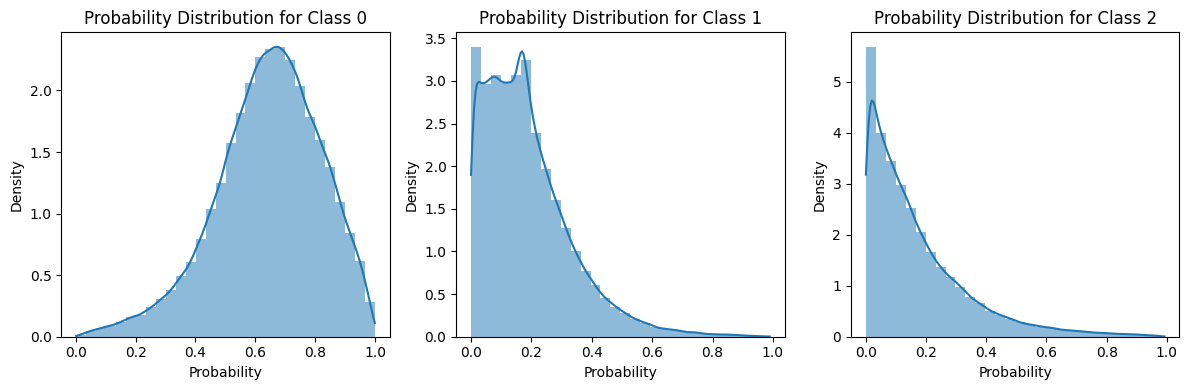

In [ ]:
# Probability distribution of class predictions
class_labels = ['Class 0', 'Class 1', 'Class 2']  # Names of the classes

plt.figure(figsize=(12, 4))
for i, class_label in enumerate(class_labels):
    plt.subplot(1, 3, i + 1)  # Create a subplot for each class
    sns.histplot(probabilities[:, i], bins=30, kde=True, stat="density", linewidth=0)
    plt.title(f'Probability Distribution for {class_label}')
    plt.xlabel('Probability')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()


In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_combined, predictions)

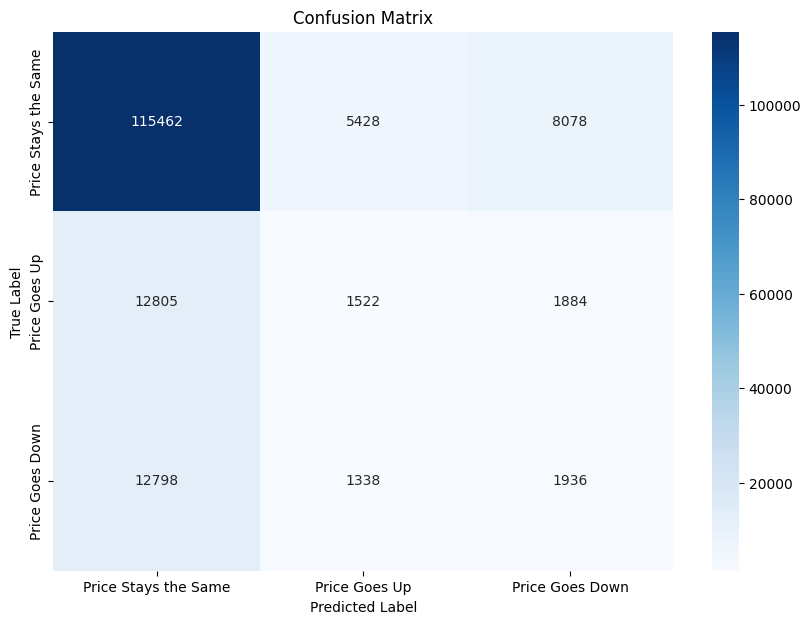

In [ ]:
# Plot confusion Matrix

classes = ["Price Stays the Same", "Price Goes Up", "Price Goes Down"]
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']


accuracy = history.history.get('accuracy')
val_accuracy = history.history.get('val_accuracy')

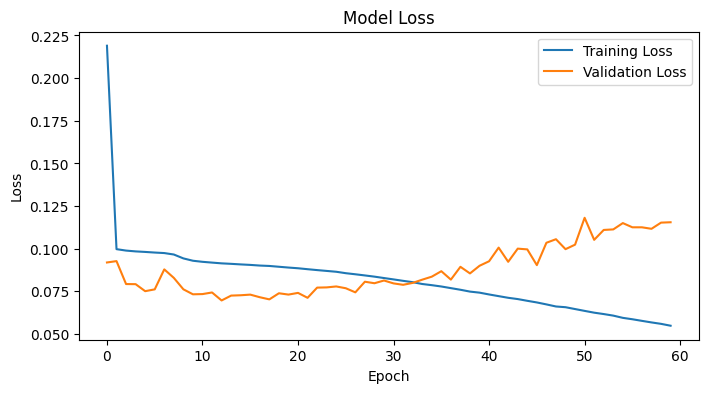

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

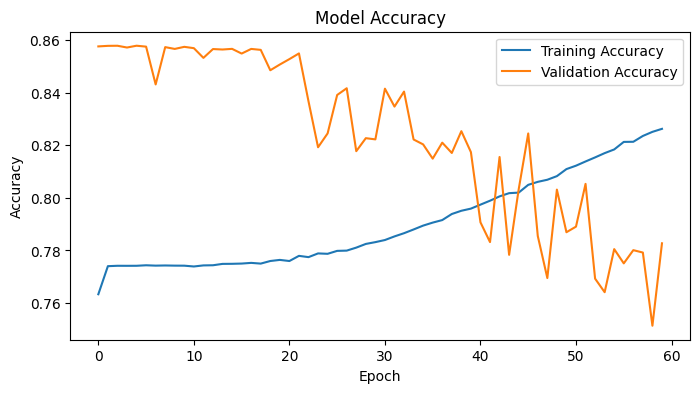

In [ ]:
if accuracy is not None:
    plt.figure(figsize=(8, 4))
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

## Model 3 ##

In [ ]:
# Focal Loss Function
@tf.keras.utils.register_keras_serializable(package="CustomLoss")
class FocalLoss(tf.keras.losses.Loss):
    def __init__(self, gamma=2.0, alpha=None, **kwargs):
        super(FocalLoss, self).__init__(**kwargs)
        self.gamma = gamma
        if alpha is None:
            alpha = [1.0]
        # Convert alpha to a constant tensor.
        self.alpha = tf.constant(alpha, dtype=tf.float32)

    def call(self, y_true, y_pred):
        # Ensure y_true is integer and remove extra dimensions.
        y_true = tf.cast(tf.squeeze(y_true), tf.int32)
        num_classes = tf.shape(y_pred)[-1]
        y_true_one_hot = tf.one_hot(y_true, depth=num_classes)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
        p_t = tf.reduce_sum(y_true_one_hot * y_pred, axis=-1)
        alpha_factor = tf.reduce_sum(y_true_one_hot * self.alpha, axis=-1)
        ce_loss = -tf.math.log(p_t)
        focal_weight = alpha_factor * tf.pow(1 - p_t, self.gamma)
        loss = focal_weight * ce_loss
        loss = tf.reshape(loss, [-1])
        return loss

    def get_config(self):
        config = super(FocalLoss, self).get_config()
        # Save alpha as a list so it can be re-created during deserialization.
        config.update({
            "gamma": self.gamma,
            "alpha": self.alpha.numpy().tolist()
        })
        return config


In [ ]:
# =============================================================================
# Local Positional Encoding Layer
# =============================================================================
class LocalPositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        self.seq_length = kwargs.pop('seq_length')
        self.d_model = kwargs.pop('d_model')
        self.kernel_size = kwargs.pop('kernel_size', 7)
        super(LocalPositionalEncoding, self).__init__(**kwargs)
        self.conv = tf.keras.layers.Conv1D(
            filters=self.d_model,
            kernel_size=self.kernel_size,
            padding='same',
            activation='relu'
        )

    def build(self, input_shape):
        self.pos_embedding = self.add_weight(
            name="pos_embedding",
            shape=(self.seq_length, self.d_model),
            initializer=tf.keras.initializers.RandomNormal(stddev=0.06),
            trainable=True
        )
        super(LocalPositionalEncoding, self).build(input_shape)

    def call(self, inputs):
        pos_emb_expanded = tf.expand_dims(self.pos_embedding, axis=0)
        local_pos = self.conv(pos_emb_expanded)
        return inputs + local_pos

    def get_config(self):
        config = super(LocalPositionalEncoding, self).get_config()
        config.update({
            'seq_length': self.seq_length,
            'd_model': self.d_model,
            'kernel_size': self.kernel_size
        })
        return config


# =============================================================================
# Transformer Encoder Layer (unchanged, but with some pre-norm improvements)
# =============================================================================
def transformer_encoder(inputs, num_heads, ff_dim):
    # Pre-norm: normalize before the attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    # Multi-head self-attention with residual connection
    attn_output, attention_weights = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads,
        key_dim=inputs.shape[-1]
    )(x, x, return_attention_scores=True)
    attn_output = Dropout(0.1)(attn_output)
    x = attn_output + inputs

    # Simplified Feed-forward network with a residual connection
    y = LayerNormalization(epsilon=1e-6)(x)
    y = Dense(ff_dim, activation="relu", kernel_initializer='he_normal')(y)
    y = Dense(inputs.shape[-1], kernel_initializer='he_normal')(y)
    y = Dropout(0.2)(y)
    return x + y, attention_weights

# =============================================================================
# Build Model
# =============================================================================
def build_train_model(seq_length, feature_dim, num_heads, ff_dim, num_classes, num_layers=2):
    """
    Build a transformer model for time series classification.
    Inputs: historical prices (e.g., OHLC)
    Output: softmax over 3 classes (0: no move, 1: up, 2: down)
    """
    inputs = Input(shape=(seq_length, feature_dim))

    # Introduce non-linearity and expand feature dimension with Dense layers.
    x = Dense(feature_dim * 8, activation="relu", kernel_initializer='he_normal')(inputs)
    x = Dense(feature_dim * 16, activation="relu", kernel_initializer='he_normal')(x)

    # Incorporate local positional encoding
    x = LocalPositionalEncoding(seq_length=seq_length, d_model=feature_dim * 16, kernel_size=3)(x)


    # Stack transformer encoder layers
    for _ in range(num_layers):
        x, _ = transformer_encoder(x, num_heads, ff_dim)

    # Global average pooling to produce a fixed-size output vector.
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(num_classes, activation="softmax", kernel_initializer='he_normal')(x)
    model = Model(inputs, outputs)
    return model

# =============================================================================
# Build, compile, and summarize the model
# =============================================================================
train_model = build_train_model(
    seq_length=24,
    feature_dim=4,     # For OHLC data
    num_heads=4,
    ff_dim=256,
    num_classes=3,
    num_layers=6
)

train_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=FocalLoss(gamma=2.0, alpha=[0.28, 0.36, 0.36]),
    metrics=["accuracy"]
)

train_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 24, 4)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 24, 32)    │        160 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 24, 64)    │      2,112 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ local_positional_e… │ (None, 24, 64)    │     13,888 │ dense_1[0][0]     │
│ (LocalPositionalEn… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 24, 64)    │        128 │ local_positional… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ [(None, 24, 64),  │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │ (None, 4, 24,     │            │ layer_normalizat… │
│                     │ 24)]              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 64)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 24, 64)    │          0 │ dropout_1[0][0],  │
│                     │                   │            │ local_positional… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 24, 64)    │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 24, 256)   │     16,640 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 24, 64)    │     16,448 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 24, 64)    │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 24, 64)    │          0 │ add[0][0],        │
│                     │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 24, 64)    │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ [(None, 24, 64),  │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │ (None, 4, 24,     │            │ layer_normalizat… │
│                     │ 24)]              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 24, 64)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 24, 64)    │          0 │ dropout_4[0][0],  │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 24, 64)    │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 614,627 (2.34 MB)

 Trainable params: 614,627 (2.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model with the early stopping callback
history = train_model.fit(
    X_train_combined,
    y_train_combined,
    validation_data=(X_val_combined, y_val_combined),
    epochs=60,
    batch_size=32,

)

Epoch 1/60
5048/5048 ━━━━━━━━━━━━━━━━━━━━ 112s 14ms/step - accuracy: 0.7339 - loss: 0.6132 - val_accuracy: 0.8579 - val_loss: 0.0877
Epoch 2/60
5048/5048 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - accuracy: 0.7729 - loss: 0.1008 - val_accuracy: 0.8579 - val_loss: 0.0778
Epoch 3/60
5048/5048 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - accuracy: 0.7723 - loss: 0.0997 - val_accuracy: 0.8579 - val_loss: 0.0769
Epoch 4/60
5048/5048 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - accuracy: 0.7757 - loss: 0.0986 - val_accuracy: 0.8579 - val_loss: 0.0763
Epoch 5/60
5048/5048 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - accuracy: 0.7750 - loss: 0.0985 - val_accuracy: 0.8579 - val_loss: 0.0735
Epoch 6/60
5048/5048 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - accuracy: 0.7723 - loss: 0.0976 - val_accuracy: 0.8577 - val_loss: 0.0725
Epoch 7/60
5048/5048 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - accuracy: 0.7754 - loss: 0.0946 - val_accuracy: 0.8575 - val_loss: 0.0705
Epoch 8/60
5048/5048 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.7734 - loss:

In [ ]:
model = train_model

In [ ]:
# Test Accuracy
test_loss, test_acc = model.evaluate(X_test_combined, y_test_combined)
print(f"Test Accuracy: {test_acc}")

5049/5049 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.7925 - loss: 0.0885
Test Accuracy: 0.7819473743438721


In [ ]:
# Getting probabilities on test set
probabilities = train_model.predict(X_test_combined)

# Convert probabilistic predictions to class labels
predictions = np.argmax(probabilities, axis=1)

5049/5049 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step


In [ ]:
# Class predictions
unique_predictions, prediction_counts = np.unique(predictions, return_counts=True)
prediction_distribution = dict(zip(unique_predictions, prediction_counts))
print(prediction_distribution)

{np.int64(0): np.int64(152600), np.int64(1): np.int64(1550), np.int64(2): np.int64(7389)}


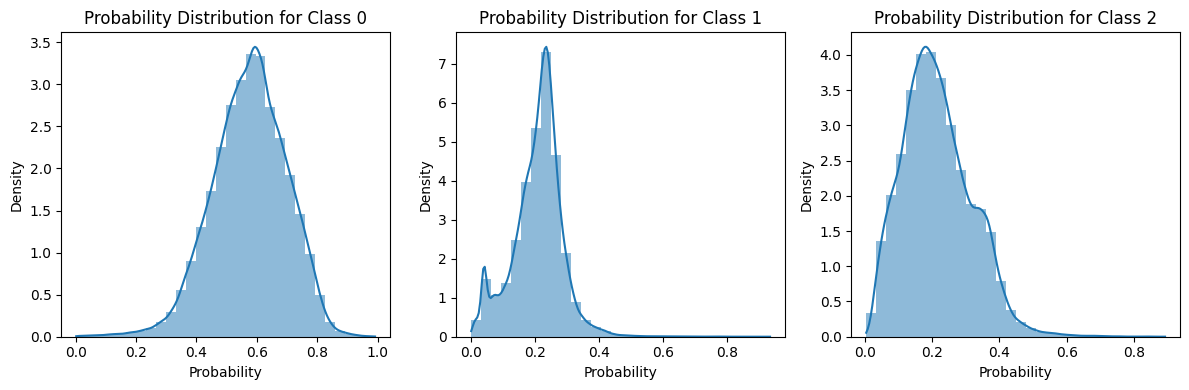

In [ ]:
# Probability distribution of class predictions
class_labels = ['Class 0', 'Class 1', 'Class 2']  # Names of the classes

plt.figure(figsize=(12, 4))
for i, class_label in enumerate(class_labels):
    plt.subplot(1, 3, i + 1)  # Create a subplot for each class
    sns.histplot(probabilities[:, i], bins=30, kde=True, stat="density", linewidth=0)
    plt.title(f'Probability Distribution for {class_label}')
    plt.xlabel('Probability')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_combined, predictions)

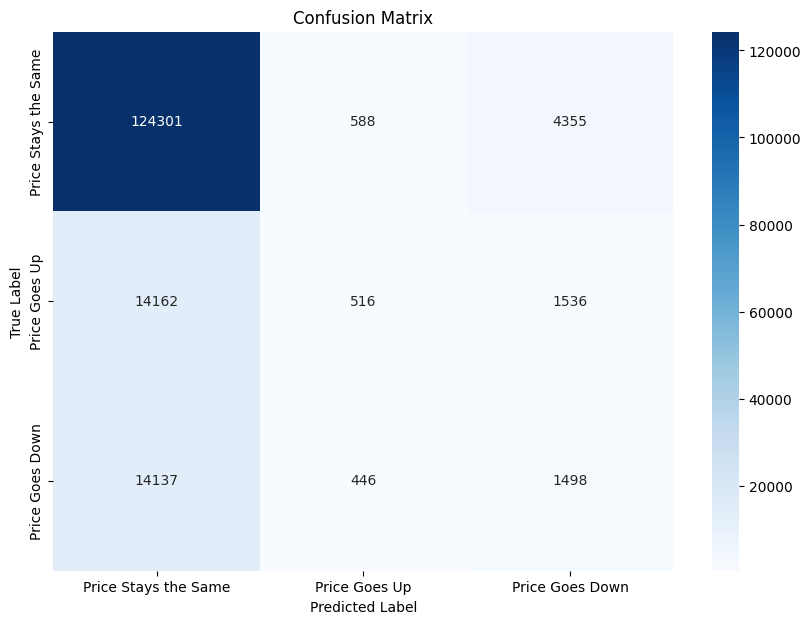

In [ ]:
# Plot confusion Matrix

classes = ["Price Stays the Same", "Price Goes Up", "Price Goes Down"]
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']


accuracy = history.history.get('accuracy')
val_accuracy = history.history.get('val_accuracy')

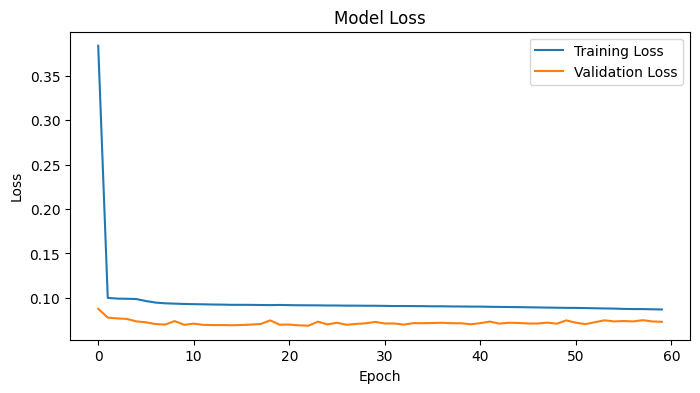

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

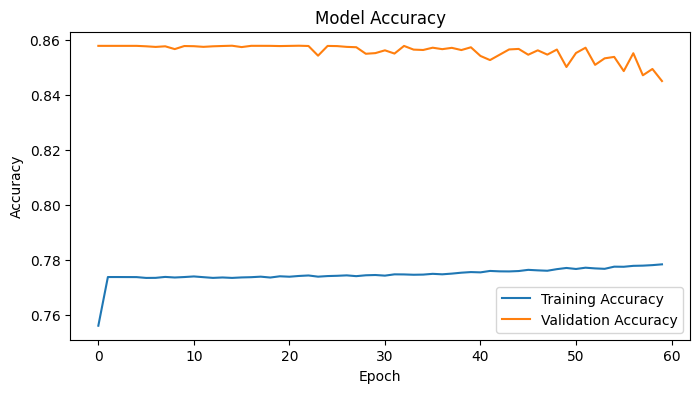

In [ ]:
if accuracy is not None:
    plt.figure(figsize=(8, 4))
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

## Model 4 ##

In [ ]:
# Focal Loss Function
@tf.keras.utils.register_keras_serializable(package="CustomLoss")
class FocalLoss(tf.keras.losses.Loss):
    def __init__(self, gamma=2.0, alpha=None, **kwargs):
        super(FocalLoss, self).__init__(**kwargs)
        self.gamma = gamma
        if alpha is None:
            alpha = [1.0]
        # Convert alpha to a constant tensor.
        self.alpha = tf.constant(alpha, dtype=tf.float32)

    def call(self, y_true, y_pred):
        # Ensure y_true is integer and remove extra dimensions.
        y_true = tf.cast(tf.squeeze(y_true), tf.int32)
        num_classes = tf.shape(y_pred)[-1]
        y_true_one_hot = tf.one_hot(y_true, depth=num_classes)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
        p_t = tf.reduce_sum(y_true_one_hot * y_pred, axis=-1)
        alpha_factor = tf.reduce_sum(y_true_one_hot * self.alpha, axis=-1)
        ce_loss = -tf.math.log(p_t)
        focal_weight = alpha_factor * tf.pow(1 - p_t, self.gamma)
        loss = focal_weight * ce_loss
        loss = tf.reshape(loss, [-1])
        return loss

    def get_config(self):
        config = super(FocalLoss, self).get_config()
        # Save alpha as a list so it can be re-created during deserialization.
        config.update({
            "gamma": self.gamma,
            "alpha": self.alpha.numpy().tolist()
        })
        return config


In [ ]:
# =============================================================================
# Local Positional Encoding Layer
# =============================================================================
class LocalPositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        self.seq_length = kwargs.pop('seq_length')
        self.d_model = kwargs.pop('d_model')
        self.kernel_size = kwargs.pop('kernel_size', 7)
        super(LocalPositionalEncoding, self).__init__(**kwargs)
        self.conv = tf.keras.layers.Conv1D(
            filters=self.d_model,
            kernel_size=self.kernel_size,
            padding='same',
            activation='relu'
        )

    def build(self, input_shape):
        self.pos_embedding = self.add_weight(
            name="pos_embedding",
            shape=(self.seq_length, self.d_model),
            initializer=tf.keras.initializers.RandomNormal(stddev=0.06),
            trainable=True
        )
        super(LocalPositionalEncoding, self).build(input_shape)

    def call(self, inputs):
        pos_emb_expanded = tf.expand_dims(self.pos_embedding, axis=0)
        local_pos = self.conv(pos_emb_expanded)
        return inputs + local_pos

    def get_config(self):
        config = super(LocalPositionalEncoding, self).get_config()
        config.update({
            'seq_length': self.seq_length,
            'd_model': self.d_model,
            'kernel_size': self.kernel_size
        })
        return config


# =============================================================================
# Transformer Encoder Layer (unchanged, but with some pre-norm improvements)
# =============================================================================
def transformer_encoder(inputs, num_heads, ff_dim):
    # Pre-norm: normalize before the attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    # Multi-head self-attention with residual connection
    attn_output, attention_weights = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads,
        key_dim=inputs.shape[-1]
    )(x, x, return_attention_scores=True)
    attn_output = Dropout(0.1)(attn_output)
    x = attn_output + inputs

    # Simplified Feed-forward network with a residual connection
    y = LayerNormalization(epsilon=1e-6)(x)
    y = Dense(ff_dim, activation="relu", kernel_initializer='he_normal')(y)
    y = Dense(inputs.shape[-1], kernel_initializer='he_normal')(y)
    y = Dropout(0.2)(y)
    return x + y, attention_weights

# =============================================================================
# Build Model
# =============================================================================
def build_train_model(seq_length, feature_dim, num_heads, ff_dim, num_classes, num_layers=2):
    """
    Build a transformer model for time series classification.
    Inputs: historical prices (e.g., OHLC)
    Output: softmax over 3 classes (0: no move, 1: up, 2: down)
    """
    inputs = Input(shape=(seq_length, feature_dim))

    # Introduce non-linearity and expand feature dimension with Dense layers.
    x = Dense(feature_dim * 8, activation="relu", kernel_initializer='he_normal')(inputs)
    x = Dense(feature_dim * 16, activation="relu", kernel_initializer='he_normal')(x)

    # Incorporate local positional encoding
    x = LocalPositionalEncoding(seq_length=seq_length, d_model=feature_dim * 16, kernel_size=3)(x)


    # Stack transformer encoder layers
    for _ in range(num_layers):
        x, _ = transformer_encoder(x, num_heads, ff_dim)

    # Global average pooling to produce a fixed-size output vector.
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(num_classes, activation="softmax", kernel_initializer='he_normal')(x)
    model = Model(inputs, outputs)
    return model

# =============================================================================
# Build, compile, and summarize the model
# =============================================================================
train_model = build_train_model(
    seq_length=120,
    feature_dim=4,     # For OHLC data
    num_heads=4,
    ff_dim=256,
    num_classes=3,
    num_layers=6
)

train_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=FocalLoss(gamma=2.0, alpha=[0.28, 0.36, 0.36]),
    metrics=["accuracy"]
)

train_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 120, 4)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 120, 32)   │        160 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 120, 64)   │      2,112 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ local_positional_e… │ (None, 120, 64)   │     20,032 │ dense_1[0][0]     │
│ (LocalPositionalEn… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 120, 64)   │        128 │ local_positional… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ [(None, 120, 64), │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │ (None, 4, 120,    │            │ layer_normalizat… │
│                     │ 120)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 120, 64)   │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 120, 64)   │          0 │ dropout_1[0][0],  │
│                     │                   │            │ local_positional… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 120, 64)   │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 120, 256)  │     16,640 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 120, 64)   │     16,448 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 120, 64)   │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 120, 64)   │          0 │ add[0][0],        │
│                     │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 120, 64)   │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ [(None, 120, 64), │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │ (None, 4, 120,    │            │ layer_normalizat… │
│                     │ 120)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 120, 64)   │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 120, 64)   │          0 │ dropout_4[0][0],  │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 120, 64)   │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 620,771 (2.37 MB)

 Trainable params: 620,771 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model with the early stopping callback
history = train_model.fit(
    X_train_combined,
    y_train_combined,
    validation_data=(X_val_combined, y_val_combined),
    epochs=60,
    batch_size=32,

)

Epoch 1/60
5030/5030 ━━━━━━━━━━━━━━━━━━━━ 159s 21ms/step - accuracy: 0.3325 - loss: 2.3925 - val_accuracy: 0.8574 - val_loss: 0.0735
Epoch 2/60
5030/5030 ━━━━━━━━━━━━━━━━━━━━ 68s 14ms/step - accuracy: 0.7743 - loss: 0.0997 - val_accuracy: 0.8511 - val_loss: 0.0827
Epoch 3/60
5030/5030 ━━━━━━━━━━━━━━━━━━━━ 67s 13ms/step - accuracy: 0.7727 - loss: 0.0988 - val_accuracy: 0.8580 - val_loss: 0.0794
Epoch 4/60
5030/5030 ━━━━━━━━━━━━━━━━━━━━ 68s 13ms/step - accuracy: 0.7730 - loss: 0.0976 - val_accuracy: 0.8534 - val_loss: 0.0815
Epoch 5/60
5030/5030 ━━━━━━━━━━━━━━━━━━━━ 69s 14ms/step - accuracy: 0.7722 - loss: 0.0937 - val_accuracy: 0.8301 - val_loss: 0.0859
Epoch 6/60
5030/5030 ━━━━━━━━━━━━━━━━━━━━ 68s 14ms/step - accuracy: 0.7742 - loss: 0.0917 - val_accuracy: 0.8568 - val_loss: 0.0734
Epoch 7/60
5030/5030 ━━━━━━━━━━━━━━━━━━━━ 68s 13ms/step - accuracy: 0.7757 - loss: 0.0906 - val_accuracy: 0.8574 - val_loss: 0.0714
Epoch 8/60
5030/5030 ━━━━━━━━━━━━━━━━━━━━ 68s 13ms/step - accuracy: 0.7736 

In [ ]:
model = train_model

In [ ]:
# Test Accuracy
test_loss, test_acc = model.evaluate(X_test_combined, y_test_combined)
print(f"Test Accuracy: {test_acc}")

5031/5031 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.6815 - loss: 0.2282
Test Accuracy: 0.670775294303894


In [ ]:
# Getting probabilities on test set
probabilities = train_model.predict(X_test_combined)

# Convert probabilistic predictions to class labels
predictions = np.argmax(probabilities, axis=1)

5031/5031 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step


In [ ]:
# Class predictions
unique_predictions, prediction_counts = np.unique(predictions, return_counts=True)
prediction_distribution = dict(zip(unique_predictions, prediction_counts))
print(prediction_distribution)

{np.int64(0): np.int64(126096), np.int64(1): np.int64(19295), np.int64(2): np.int64(15572)}


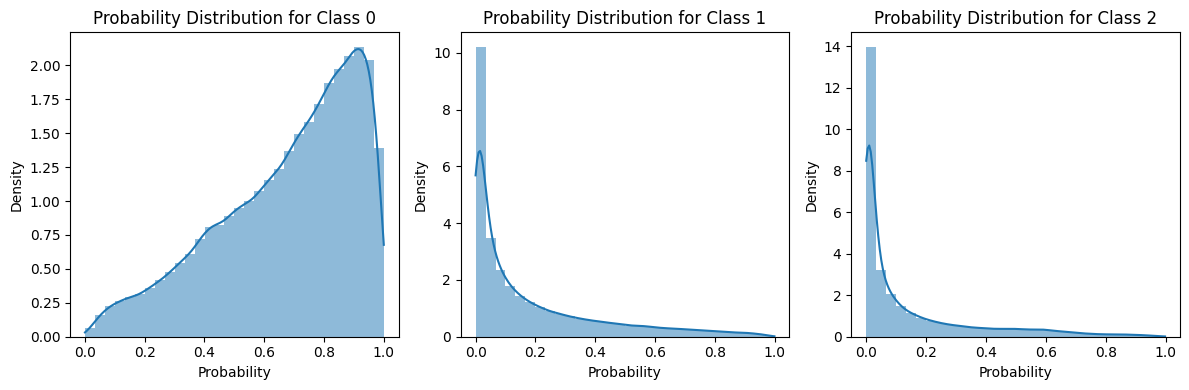

In [ ]:
# Probability distribution of class predictions
class_labels = ['Class 0', 'Class 1', 'Class 2']  # Names of the classes

plt.figure(figsize=(12, 4))
for i, class_label in enumerate(class_labels):
    plt.subplot(1, 3, i + 1)  # Create a subplot for each class
    sns.histplot(probabilities[:, i], bins=30, kde=True, stat="density", linewidth=0)
    plt.title(f'Probability Distribution for {class_label}')
    plt.xlabel('Probability')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_combined, predictions)

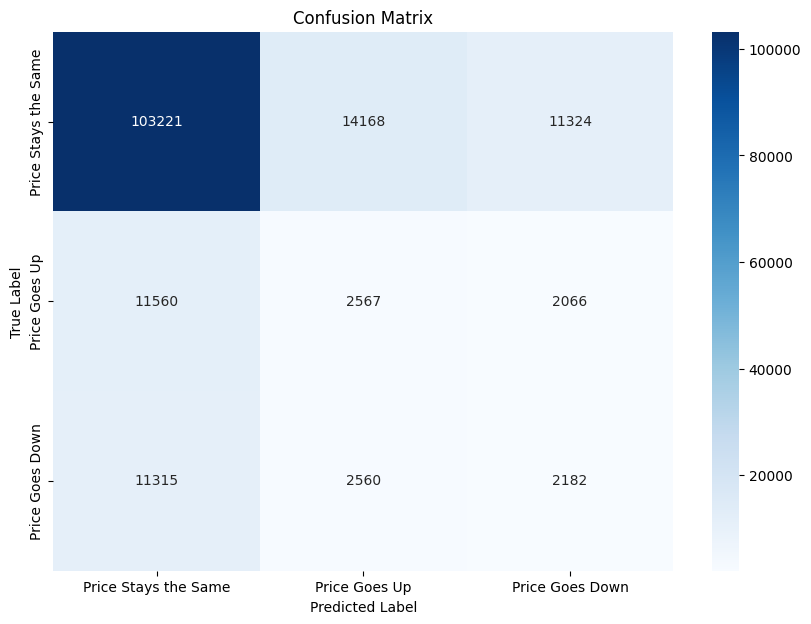

In [ ]:
# Plot confusion Matrix

classes = ["Price Stays the Same", "Price Goes Up", "Price Goes Down"]
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']


accuracy = history.history.get('accuracy')
val_accuracy = history.history.get('val_accuracy')

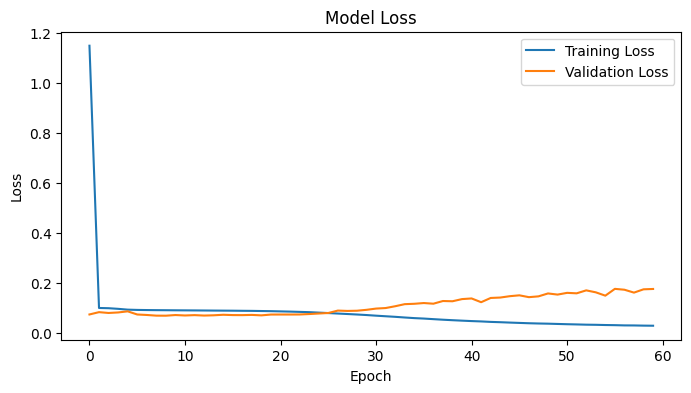

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

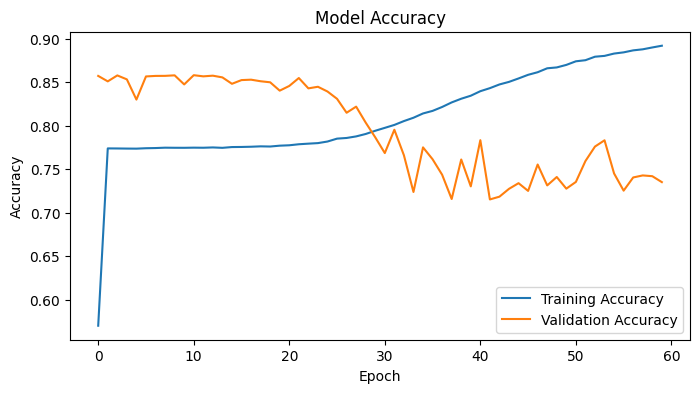

In [ ]:
if accuracy is not None:
    plt.figure(figsize=(8, 4))
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

## Model 5##

Local Positional Encoding

Weighted Cross-entropy loss



In [ ]:
# =============================================================================
# Local Positional Encoding Layer
# =============================================================================
class LocalPositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        self.seq_length = kwargs.pop('seq_length')
        self.d_model = kwargs.pop('d_model')
        self.kernel_size = kwargs.pop('kernel_size', 5)
        super(LocalPositionalEncoding, self).__init__(**kwargs)
        self.conv = tf.keras.layers.Conv1D(
            filters=self.d_model,
            kernel_size=self.kernel_size,
            padding='same',
            activation='relu'
        )

    def build(self, input_shape):
        self.pos_embedding = self.add_weight(
            name="pos_embedding",
            shape=(self.seq_length, self.d_model),
            initializer=tf.keras.initializers.RandomNormal(stddev=0.06),
            trainable=True
        )
        super(LocalPositionalEncoding, self).build(input_shape)

    def call(self, inputs):
        pos_emb_expanded = tf.expand_dims(self.pos_embedding, axis=0)
        local_pos = self.conv(pos_emb_expanded)
        return inputs + local_pos

    def get_config(self):
        config = super(LocalPositionalEncoding, self).get_config()
        config.update({
            'seq_length': self.seq_length,
            'd_model': self.d_model,
            'kernel_size': self.kernel_size
        })
        return config


# =============================================================================
# Transformer Encoder Layer (unchanged, but with some pre-norm improvements)
# =============================================================================
def transformer_encoder(inputs, num_heads, ff_dim):
    # Pre-norm: normalize before the attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    # Multi-head self-attention with residual connection
    attn_output, attention_weights = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads,
        key_dim=inputs.shape[-1]
    )(x, x, return_attention_scores=True)
    attn_output = Dropout(0.1)(attn_output)
    x = attn_output + inputs

    # Simplified Feed-forward network with a residual connection
    y = LayerNormalization(epsilon=1e-6)(x)
    y = Dense(ff_dim, activation="relu", kernel_initializer='he_normal')(y)
    y = Dense(inputs.shape[-1], kernel_initializer='he_normal')(y)
    y = Dropout(0.1)(y)
    return x + y, attention_weights

# =============================================================================
# Build Model
# =============================================================================
def build_train_model(seq_length, feature_dim, num_heads, ff_dim, num_classes, num_layers=2):
    """
    Build a transformer model for time series classification.
    Inputs: historical prices (e.g., OHLC)
    Output: softmax over 3 classes (0: no move, 1: up, 2: down)
    """
    inputs = Input(shape=(seq_length, feature_dim))

    # Introduce non-linearity and expand feature dimension with Dense layers.
    x = Dense(feature_dim * 8, activation="relu", kernel_initializer='he_normal')(inputs)
    x = Dense(feature_dim * 16, activation="relu", kernel_initializer='he_normal')(x)

    # Incorporate local positional encoding
    x = LocalPositionalEncoding(seq_length=seq_length, d_model=feature_dim * 16, kernel_size=3)(x)


    # Stack transformer encoder layers
    for _ in range(num_layers):
        x, _ = transformer_encoder(x, num_heads, ff_dim)

    # Global average pooling to produce a fixed-size output vector.
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(num_classes, activation="softmax", kernel_initializer='he_normal')(x)
    model = Model(inputs, outputs)
    return model

# =============================================================================
# Build, compile, and summarize the model
# =============================================================================
train_model = build_train_model(
    seq_length=72,
    feature_dim=4,     # For OHLC data
    num_heads=4,
    ff_dim=256,
    num_classes=3,
    num_layers=6
)

train_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

train_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 35, 4)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 35, 32)         │            160 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 35, 64)         │          2,112 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ local_positional_encoding │ (None, 35, 64)         │         14,592 │ dense_1[0][0]          │
│ (LocalPositionalEncoding) │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 35, 64)         │            128 │ local_positional_enco… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ [(None, 35, 64),       │         66,368 │ layer_normalization[0… │
│ (MultiHeadAttention)      │ (None, 4, 35, 35)]     │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 35, 64)         │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 35, 64)         │              0 │ dropout_1[0][0],       │
│                           │                        │                │ local_positional_enco… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 35, 64)         │            128 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 35, 256)        │         16,640 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 35, 64)         │         16,448 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 35, 64)         │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 35, 64)         │              0 │ add[0][0],             │
│                           │                        │                │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 35, 64)         │            128 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ [(None, 35, 64),       │         66,368 │ layer_normalization_2… │
│ (MultiHeadAttention)      │ (None, 4, 35, 35)]     │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)  

 Total params: 615,331 (2.35 MB)

 Trainable params: 615,331 (2.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compute initial class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_combined), y=y_train_combined)

# Adjust the class weights to give more importance to 1s and 2s
adjustment_factor = 3
class_weights[1] *= adjustment_factor
class_weights[2] *= adjustment_factor

class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [ ]:
history = train_model.fit(X_train_combined, y_train_combined, validation_data=(X_val_combined, y_val_combined), epochs=300,class_weight=class_weights_dict, batch_size=32)

Epoch 1/300
5046/5046 ━━━━━━━━━━━━━━━━━━━━ 124s 16ms/step - accuracy: 0.1513 - loss: 2.1142 - val_accuracy: 0.0777 - val_loss: 1.5873
Epoch 2/300
5046/5046 ━━━━━━━━━━━━━━━━━━━━ 46s 9ms/step - accuracy: 0.1237 - loss: 1.7688 - val_accuracy: 0.0686 - val_loss: 1.4039
Epoch 3/300
5046/5046 ━━━━━━━━━━━━━━━━━━━━ 46s 9ms/step - accuracy: 0.1216 - loss: 1.7533 - val_accuracy: 0.0840 - val_loss: 1.3435
Epoch 4/300
5046/5046 ━━━━━━━━━━━━━━━━━━━━ 46s 9ms/step - accuracy: 0.1256 - loss: 1.7473 - val_accuracy: 0.0781 - val_loss: 1.4616
Epoch 5/300
5046/5046 ━━━━━━━━━━━━━━━━━━━━ 46s 9ms/step - accuracy: 0.1272 - loss: 1.7410 - val_accuracy: 0.0769 - val_loss: 1.4907
Epoch 6/300
5046/5046 ━━━━━━━━━━━━━━━━━━━━ 46s 9ms/step - accuracy: 0.1308 - loss: 1.7435 - val_accuracy: 0.0751 - val_loss: 1.4176
Epoch 7/300
5046/5046 ━━━━━━━━━━━━━━━━━━━━ 46s 9ms/step - accuracy: 0.1319 - loss: 1.7386 - val_accuracy: 0.0767 - val_loss: 1.4144
Epoch 8/300
5046/5046 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - accuracy: 0.1291

In [ ]:
# Save the model
train_model.save('/content/drive/MyDrive/MSc-M60-Model-5.keras')

In [ ]:
# Provide the custom objects that the model needs.
custom_objects = {
    'LocalPositionalEncoding': LocalPositionalEncoding
}

# Load the model
model = load_model('/content/drive/MyDrive/MSc-M60-Model-5.keras', custom_objects=custom_objects)


## Evaluating Model ##

In [ ]:
model = train_model

In [ ]:
# Test Accuracy
test_loss, test_acc = model.evaluate(X_test_combined, y_test_combined)
print(f"Test Accuracy: {test_acc}")

5047/5047 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.3961 - loss: 1.9948
Test Accuracy: 0.4146575629711151


In [ ]:
# Getting probabilities on test set
probabilities = train_model.predict(X_test_combined)

# Convert probabilistic predictions to class labels
predictions = np.argmax(probabilities, axis=1)

5047/5047 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step


In [ ]:
# Class predictions
unique_predictions, prediction_counts = np.unique(predictions, return_counts=True)
prediction_distribution = dict(zip(unique_predictions, prediction_counts))
print(prediction_distribution)

{0: 61476, 1: 53166, 2: 46831}


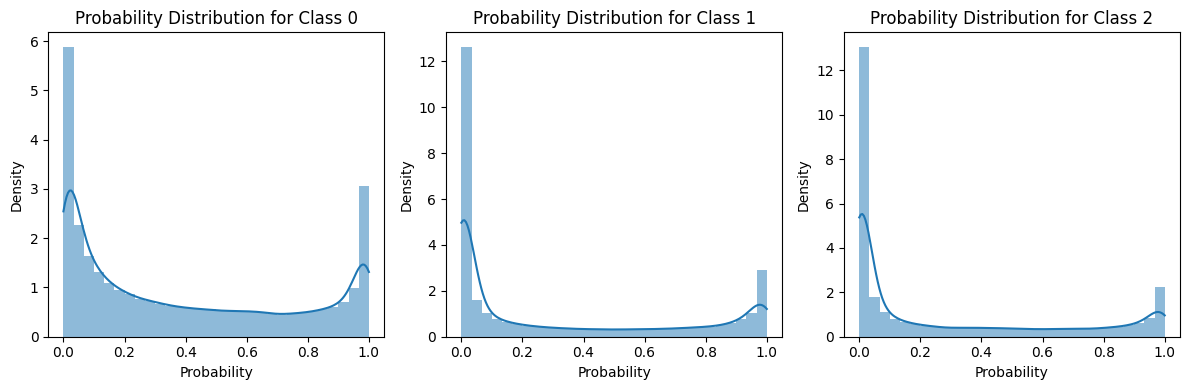

In [ ]:
# Probability distribution of class predictions
class_labels = ['Class 0', 'Class 1', 'Class 2']  # Names of the classes

plt.figure(figsize=(12, 4))
for i, class_label in enumerate(class_labels):
    plt.subplot(1, 3, i + 1)  # Create a subplot for each class
    sns.histplot(probabilities[:, i], bins=30, kde=True, stat="density", linewidth=0)
    plt.title(f'Probability Distribution for {class_label}')
    plt.xlabel('Probability')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_combined, predictions)

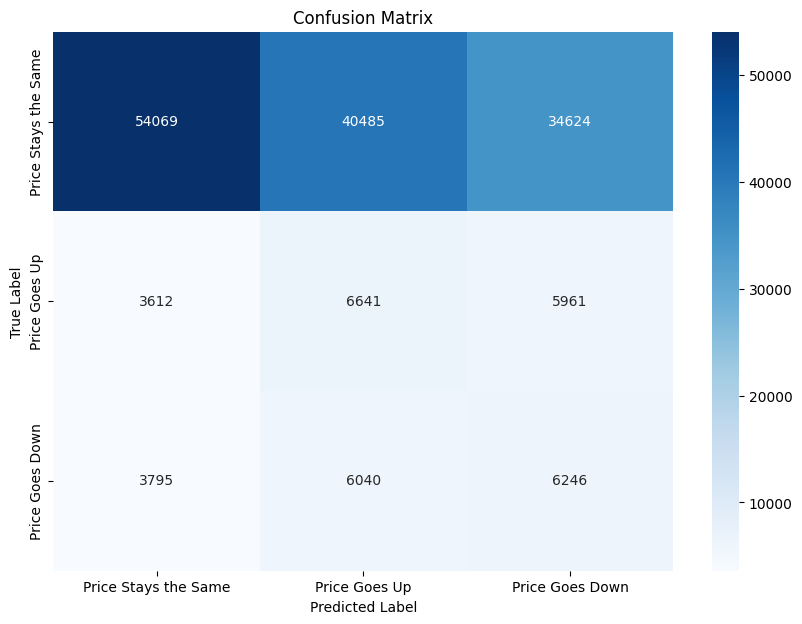

In [ ]:
# Plot confusion Matrix

classes = ["Price Stays the Same", "Price Goes Up", "Price Goes Down"]
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']


accuracy = history.history.get('accuracy')
val_accuracy = history.history.get('val_accuracy')

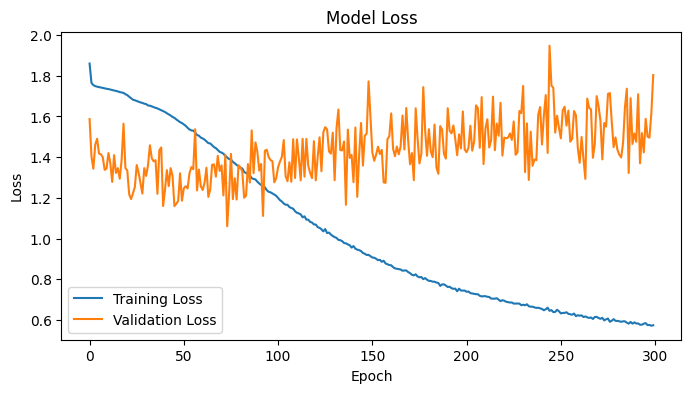

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

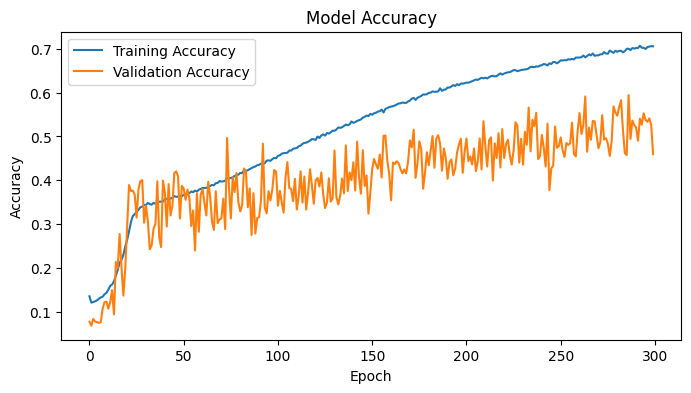

In [ ]:
if accuracy is not None:
    plt.figure(figsize=(8, 4))
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

## Model 6 ##

Local Positional encoding

Weighted cross entropy loss


In [ ]:
# =============================================================================
# Local Positional Encoding Layer
# =============================================================================
class LocalPositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        self.seq_length = kwargs.pop('seq_length')
        self.d_model = kwargs.pop('d_model')
        self.kernel_size = kwargs.pop('kernel_size', 5)
        super(LocalPositionalEncoding, self).__init__(**kwargs)
        self.conv = tf.keras.layers.Conv1D(
            filters=self.d_model,
            kernel_size=self.kernel_size,
            padding='same',
            activation='relu'
        )

    def build(self, input_shape):
        self.pos_embedding = self.add_weight(
            name="pos_embedding",
            shape=(self.seq_length, self.d_model),
            initializer=tf.keras.initializers.RandomNormal(stddev=0.06),
            trainable=True
        )
        super(LocalPositionalEncoding, self).build(input_shape)

    def call(self, inputs):
        pos_emb_expanded = tf.expand_dims(self.pos_embedding, axis=0)
        local_pos = self.conv(pos_emb_expanded)
        return inputs + local_pos

    def get_config(self):
        config = super(LocalPositionalEncoding, self).get_config()
        config.update({
            'seq_length': self.seq_length,
            'd_model': self.d_model,
            'kernel_size': self.kernel_size
        })
        return config


# =============================================================================
# Transformer Encoder Layer (unchanged, but with some pre-norm improvements)
# =============================================================================
def transformer_encoder(inputs, num_heads, ff_dim):
    # Pre-norm: normalize before the attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    # Multi-head self-attention with residual connection
    attn_output, attention_weights = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads,
        key_dim=inputs.shape[-1]
    )(x, x, return_attention_scores=True)
    attn_output = Dropout(0.1)(attn_output)
    x = attn_output + inputs

    # Simplified Feed-forward network with a residual connection
    y = LayerNormalization(epsilon=1e-6)(x)
    y = Dense(ff_dim, activation="relu", kernel_initializer='he_normal')(y)
    y = Dense(inputs.shape[-1], kernel_initializer='he_normal')(y)
    y = Dropout(0.1)(y)
    return x + y, attention_weights

# =============================================================================
# Build Model
# =============================================================================
def build_train_model(seq_length, feature_dim, num_heads, ff_dim, num_classes, num_layers=2):
    """
    Build a transformer model for time series classification.
    Inputs: historical prices (e.g., OHLC)
    Output: softmax over 3 classes (0: no move, 1: up, 2: down)
    """
    inputs = Input(shape=(seq_length, feature_dim))

    # Introduce non-linearity and expand feature dimension with Dense layers.
    x = Dense(feature_dim * 8, activation="relu", kernel_initializer='he_normal')(inputs)
    x = Dense(feature_dim * 16, activation="relu", kernel_initializer='he_normal')(x)

    # Incorporate local positional encoding
    x = LocalPositionalEncoding(seq_length=seq_length, d_model=feature_dim * 16, kernel_size=3)(x)


    # Stack transformer encoder layers
    for _ in range(num_layers):
        x, _ = transformer_encoder(x, num_heads, ff_dim)

    # Global average pooling to produce a fixed-size output vector.
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(num_classes, activation="softmax", kernel_initializer='he_normal')(x)
    model = Model(inputs, outputs)
    return model

# =============================================================================
# Build, compile, and summarize the model
# =============================================================================
train_model = build_train_model(
    seq_length=72,
    feature_dim=4,     # For OHLC data
    num_heads=4,
    ff_dim=256,
    num_classes=3,
    num_layers=6
)

train_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

train_model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 75, 5)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_105 (Dense)         │ (None, 75, 40)         │            240 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_106 (Dense)         │ (None, 75, 80)         │          3,280 │ dense_105[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ local_positional_encodin… │ (None, 75, 80)         │         25,280 │ dense_106[0][0]        │
│ (LocalPositionalEncoding) │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_84    │ (None, 75, 80)         │            160 │ local_positional_enco… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_42   │ [(None, 75, 80),       │        103,440 │ layer_normalization_8… │
│ (MultiHeadAttention)      │ (None, 4, 75, 75)]     │                │ layer_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_133 (Dropout)     │ (None, 75, 80)         │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_84 (Add)              │ (None, 75, 80)         │              0 │ dropout_133[0][0],     │
│                           │                        │                │ local_positional_enco… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_85    │ (None, 75, 80)         │            160 │ add_84[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_107 (Dense)         │ (None, 75, 128)        │         10,368 │ layer_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_108 (Dense)         │ (None, 75, 80)         │         10,320 │ dense_107[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_134 (Dropout)     │ (None, 75, 80)         │              0 │ dense_108[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_85 (Add)              │ (None, 75, 80)         │              0 │ add_84[0][0],          │
│                           │                        │                │ dropout_134[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_86    │ (None, 75, 80)         │            160 │ add_85[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_43   │ [(None, 75, 80),       │        103,440 │ layer_normalization_8… │
│ (MultiHeadAttention)      │ (None, 4, 75, 75)]     │                │ layer_normalization_8… │
├──────────────────────

 Total params: 775,731 (2.96 MB)

 Trainable params: 775,731 (2.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compute initial class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_combined), y=y_train_combined)

# Adjust the class weights to give more importance to 1s and 2s
adjustment_factor = 4
class_weights[1] *= adjustment_factor
class_weights[2] *= adjustment_factor

class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [ ]:
history = train_model.fit(X_train_combined, y_train_combined, validation_data=(X_val_combined, y_val_combined), epochs=300,class_weight=class_weights_dict, batch_size=32)

Epoch 1/300
4699/4699 ━━━━━━━━━━━━━━━━━━━━ 104s 15ms/step - accuracy: 0.0681 - loss: 3.7594 - val_accuracy: 0.0281 - val_loss: 2.5374
Epoch 2/300
4699/4699 ━━━━━━━━━━━━━━━━━━━━ 47s 10ms/step - accuracy: 0.0595 - loss: 2.8943 - val_accuracy: 0.0289 - val_loss: 1.9730
Epoch 3/300
4699/4699 ━━━━━━━━━━━━━━━━━━━━ 46s 10ms/step - accuracy: 0.0614 - loss: 2.8730 - val_accuracy: 0.0274 - val_loss: 2.3837
Epoch 4/300
4699/4699 ━━━━━━━━━━━━━━━━━━━━ 46s 10ms/step - accuracy: 0.0625 - loss: 2.7900 - val_accuracy: 0.0279 - val_loss: 2.0619
Epoch 5/300
4699/4699 ━━━━━━━━━━━━━━━━━━━━ 46s 10ms/step - accuracy: 0.0638 - loss: 2.7867 - val_accuracy: 0.0273 - val_loss: 2.4083
Epoch 6/300
4699/4699 ━━━━━━━━━━━━━━━━━━━━ 46s 10ms/step - accuracy: 0.0659 - loss: 2.7894 - val_accuracy: 0.0268 - val_loss: 2.0665
Epoch 7/300
4699/4699 ━━━━━━━━━━━━━━━━━━━━ 47s 10ms/step - accuracy: 0.0683 - loss: 2.7329 - val_accuracy: 0.0300 - val_loss: 1.9710
Epoch 8/300
4699/4699 ━━━━━━━━━━━━━━━━━━━━ 47s 10ms/step - accuracy:

In [ ]:
# Save the model
train_model.save('/content/drive/MyDrive/MSc-M60-Model-5.keras')

In [ ]:
# Provide the custom objects that the model needs.
custom_objects = {
    'LocalPositionalEncoding': LocalPositionalEncoding
}

# Load the model
model = load_model('/content/drive/MyDrive/MSc-M60-Model-5.keras', custom_objects=custom_objects)

In [ ]:
model = train_model

In [ ]:
# Test Accuracy
test_loss, test_acc = model.evaluate(X_test_combined, y_test_combined)
print(f"Test Accuracy: {test_acc}")

4699/4699 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.7837 - loss: 1.4052
Test Accuracy: 0.7728611826896667


In [ ]:
# Getting probabilities on test set
probabilities = train_model.predict(X_test_combined)

# Convert probabilistic predictions to class labels
predictions = np.argmax(probabilities, axis=1)

4699/4699 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step


In [ ]:
# Class predictions
unique_predictions, prediction_counts = np.unique(predictions, return_counts=True)
prediction_distribution = dict(zip(unique_predictions, prediction_counts))
print(prediction_distribution)

{0: 124744, 1: 11845, 2: 13764}


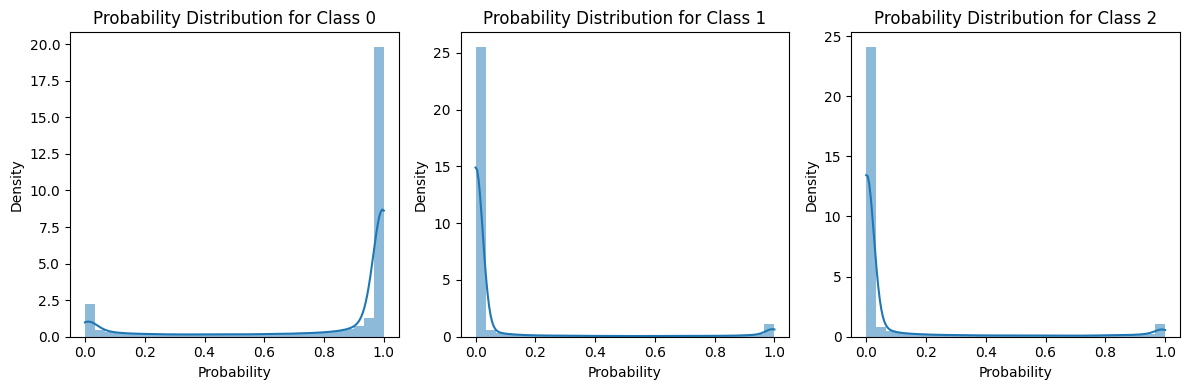

In [ ]:
# Probability distribution of class predictions
class_labels = ['Class 0', 'Class 1', 'Class 2']  # Names of the classes

plt.figure(figsize=(12, 4))
for i, class_label in enumerate(class_labels):
    plt.subplot(1, 3, i + 1)  # Create a subplot for each class
    sns.histplot(probabilities[:, i], bins=30, kde=True, stat="density", linewidth=0)
    plt.title(f'Probability Distribution for {class_label}')
    plt.xlabel('Probability')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_combined, predictions)

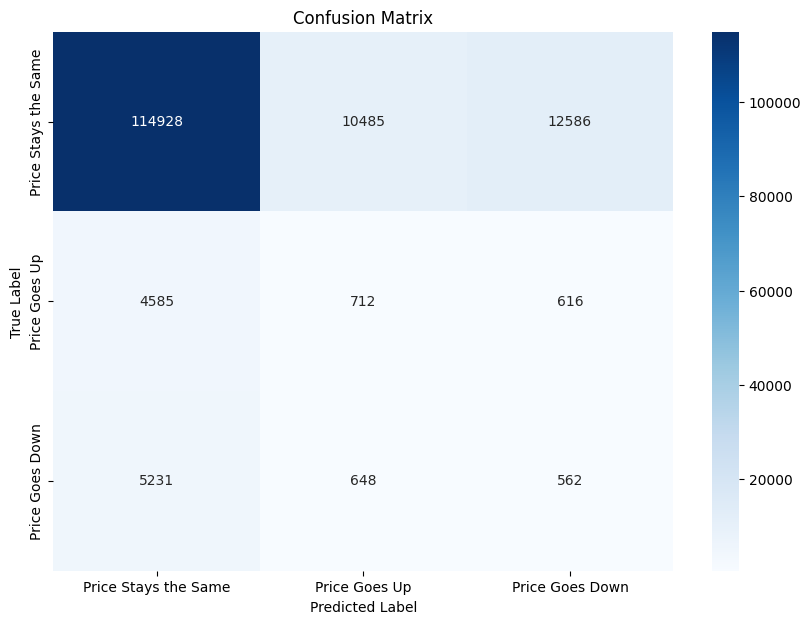

In [ ]:
# Plot confusion Matrix

classes = ["Price Stays the Same", "Price Goes Up", "Price Goes Down"]
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']


accuracy = history.history.get('accuracy')
val_accuracy = history.history.get('val_accuracy')

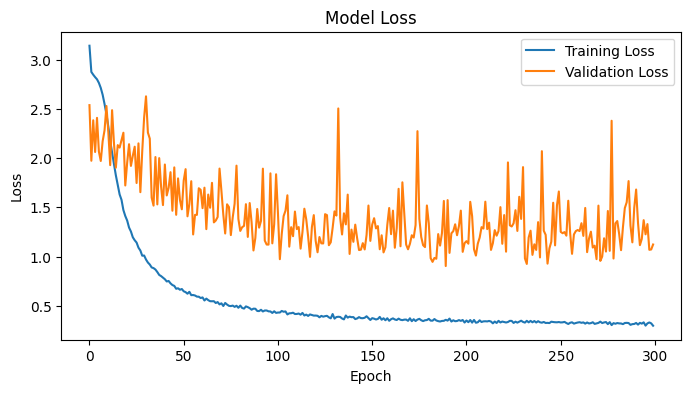

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

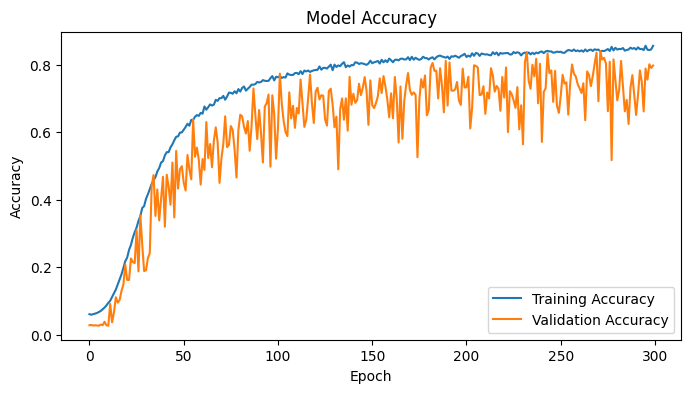

In [ ]:
if accuracy is not None:
    plt.figure(figsize=(8, 4))
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

## Model 7 ##
Focal loss

learnable positional encoding



---



In [ ]:
# Focal Loss Function
@tf.keras.utils.register_keras_serializable(package="CustomLoss")
class FocalLoss(tf.keras.losses.Loss):
    def __init__(self, gamma=2.0, alpha=None, **kwargs):
        super(FocalLoss, self).__init__(**kwargs)
        self.gamma = gamma
        if alpha is None:
            alpha = [1.0]
        # Convert alpha to a constant tensor.
        self.alpha = tf.constant(alpha, dtype=tf.float32)

    def call(self, y_true, y_pred):
        # Ensure y_true is integer and remove extra dimensions.
        y_true = tf.cast(tf.squeeze(y_true), tf.int32)
        num_classes = tf.shape(y_pred)[-1]
        y_true_one_hot = tf.one_hot(y_true, depth=num_classes)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
        p_t = tf.reduce_sum(y_true_one_hot * y_pred, axis=-1)
        alpha_factor = tf.reduce_sum(y_true_one_hot * self.alpha, axis=-1)
        ce_loss = -tf.math.log(p_t)
        focal_weight = alpha_factor * tf.pow(1 - p_t, self.gamma)
        loss = focal_weight * ce_loss
        loss = tf.reshape(loss, [-1])
        return loss

    def get_config(self):
        config = super(FocalLoss, self).get_config()
        # Save alpha as a list so it can be re-created during deserialization.
        config.update({
            "gamma": self.gamma,
            "alpha": self.alpha.numpy().tolist()
        })
        return config


In [ ]:
# =============================================================================
# Learnable Positional Encoding Layer
# =============================================================================
class LearnablePositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, seq_length, d_model, **kwargs):
        super(LearnablePositionalEncoding, self).__init__(**kwargs)
        self.seq_length = seq_length
        self.d_model = d_model

    def build(self, input_shape):
        self.pos_embedding = self.add_weight(
            name="pos_embedding",
            shape=(self.seq_length, self.d_model),
            initializer=tf.keras.initializers.RandomNormal(stddev=0.06),
            trainable=True
        )
        super(LearnablePositionalEncoding, self).build(input_shape)

    def call(self, inputs):
        # Expand dims to broadcast across the batch dimension
        pos_emb_expanded = tf.expand_dims(self.pos_embedding, axis=0)
        return inputs + pos_emb_expanded

    def get_config(self):
        config = super(LearnablePositionalEncoding, self).get_config()
        config.update({
            'seq_length': self.seq_length,
            'd_model': self.d_model,
        })
        return config

# =============================================================================
# Transformer Encoder Layer (with pre-norm improvements)
# =============================================================================
def transformer_encoder(inputs, num_heads, ff_dim):
    # Pre-norm: normalize before the attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    # Multi-head self-attention with residual connection
    attn_output, attention_weights = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads,
        key_dim=inputs.shape[-1]
    )(x, x, return_attention_scores=True)
    attn_output = Dropout(0.1)(attn_output)
    x = attn_output + inputs

    # Simplified Feed-forward network with a residual connection
    y = LayerNormalization(epsilon=1e-6)(x)
    y = Dense(ff_dim, activation="relu", kernel_initializer='he_normal')(y)
    y = Dense(inputs.shape[-1], kernel_initializer='he_normal')(y)
    y = Dropout(0.1)(y)
    return x + y, attention_weights

# =============================================================================
# Build Model
# =============================================================================
def build_train_model(seq_length, feature_dim, num_heads, ff_dim, num_classes, num_layers=2):

    inputs = Input(shape=(seq_length, feature_dim))

    # Introducing non-linearity and expand feature dimension with Dense layers.
    x = Dense(feature_dim * 8, activation="relu", kernel_initializer='he_normal')(inputs)
    x = Dense(feature_dim * 16, activation="relu", kernel_initializer='he_normal')(x)

    # Incorporating learnable positional encoding
    x = LearnablePositionalEncoding(seq_length=seq_length, d_model=feature_dim * 16)(x)

    # Stack transformer encoder layers
    for _ in range(num_layers):
        x, _ = transformer_encoder(x, num_heads, ff_dim)

    # Global average pooling to produce a fixed-size output vector.
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(num_classes, activation="softmax", kernel_initializer='he_normal')(x)
    model = Model(inputs, outputs)
    return model

# =============================================================================
# Build, compile, and summarize the model
# =============================================================================
train_model = build_train_model(
    seq_length=72,
    feature_dim=4,     # For OHLC data
    num_heads=4,
    ff_dim=256,
    num_classes=3,
    num_layers=6
)


train_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=FocalLoss(gamma=2.0, alpha=[0.28, 0.36, 0.36]),
    metrics=["accuracy"]
)


train_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 75, 4)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 75, 32)         │            160 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 75, 64)         │          2,112 │ dense_15[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ learnable_positional_enc… │ (None, 75, 64)         │          4,800 │ dense_16[0][0]         │
│ (LearnablePositionalEnco… │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_12    │ (None, 75, 64)         │            128 │ learnable_positional_… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_6    │ [(None, 75, 64),       │         66,368 │ layer_normalization_1… │
│ (MultiHeadAttention)      │ (None, 4, 75, 75)]     │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_19 (Dropout)      │ (None, 75, 64)         │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_12 (Add)              │ (None, 75, 64)         │              0 │ dropout_19[0][0],      │
│                           │                        │                │ learnable_positional_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_13    │ (None, 75, 64)         │            128 │ add_12[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 75, 256)        │         16,640 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 75, 64)         │         16,448 │ dense_17[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_20 (Dropout)      │ (None, 75, 64)         │              0 │ dense_18[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_13 (Add)              │ (None, 75, 64)         │              0 │ add_12[0][0],          │
│                           │                        │                │ dropout_20[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_14    │ (None, 75, 64)         │            128 │ add_13[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_7    │ [(None, 75, 64),       │         66,368 │ layer_normalization_1… │
│ (MultiHeadAttention)      │ (None, 4, 75, 75)]     │                │ layer_normalization_1… │
├──────────────────────

 Total params: 605,539 (2.31 MB)

 Trainable params: 605,539 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = train_model.fit(X_train_combined, y_train_combined, validation_data=(X_val_combined, y_val_combined), epochs=70)

Epoch 1/70
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 102s 14ms/step - accuracy: 0.7177 - loss: 0.4450 - val_accuracy: 0.8416 - val_loss: 0.0831
Epoch 2/70
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 48s 10ms/step - accuracy: 0.7825 - loss: 0.0960 - val_accuracy: 0.8416 - val_loss: 0.0788
Epoch 3/70
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 51s 10ms/step - accuracy: 0.7818 - loss: 0.0952 - val_accuracy: 0.8416 - val_loss: 0.0800
Epoch 4/70
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 50s 10ms/step - accuracy: 0.7814 - loss: 0.0951 - val_accuracy: 0.8416 - val_loss: 0.0804
Epoch 5/70
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 48s 10ms/step - accuracy: 0.7834 - loss: 0.0942 - val_accuracy: 0.8405 - val_loss: 0.0799
Epoch 6/70
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 48s 10ms/step - accuracy: 0.7817 - loss: 0.0944 - val_accuracy: 0.5693 - val_loss: 0.0971
Epoch 7/70
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.7816 - loss: 0.0944 - val_accuracy: 0.8416 - val_loss: 0.0802
Epoch 8/70
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 48s 10ms/step - accuracy: 0.7810 

In [ ]:
# Save the model
train_model.save('/content/drive/MyDrive/MSc-M60-Model-7.keras')

In [ ]:
# Provide the custom objects that the model needs.
custom_objects = {
    'LearnablePositionalEncoding': LearnablePositionalEncoding,
    'focal_loss': FocalLoss
}

# Load the model
model = load_model('/content/drive/MyDrive/MSc-M60-Model-7.keras', custom_objects=custom_objects)

In [ ]:
model = train_model

In [ ]:
# Test Accuracy
test_loss, test_acc = model.evaluate(X_test_combined, y_test_combined)
print(f"Test Accuracy: {test_acc}")

5039/5039 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.6561 - loss: 0.1695
Test Accuracy: 0.6480956673622131


In [ ]:
# Getting probabilities on test set
probabilities = train_model.predict(X_test_combined)

# Convert probabilistic predictions to class labels
predictions = np.argmax(probabilities, axis=1)

5039/5039 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step


In [ ]:
# Class predictions
unique_predictions, prediction_counts = np.unique(predictions, return_counts=True)
prediction_distribution = dict(zip(unique_predictions, prediction_counts))
print(prediction_distribution)

{0: 120822, 1: 18380, 2: 22035}


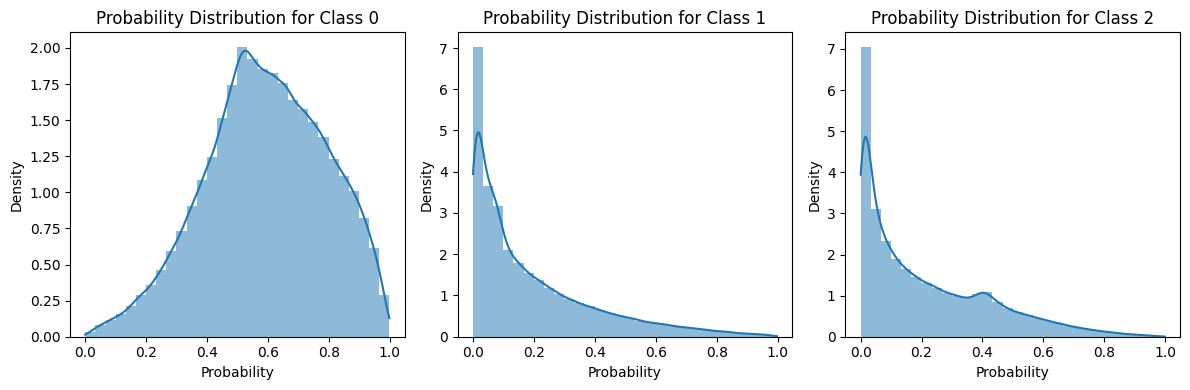

In [ ]:
# Probability distribution of class predictions
class_labels = ['Class 0', 'Class 1', 'Class 2']  # Names of the classes

plt.figure(figsize=(12, 4))
for i, class_label in enumerate(class_labels):
    plt.subplot(1, 3, i + 1)  # Create a subplot for each class
    sns.histplot(probabilities[:, i], bins=30, kde=True, stat="density", linewidth=0)
    plt.title(f'Probability Distribution for {class_label}')
    plt.xlabel('Probability')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_combined, predictions)

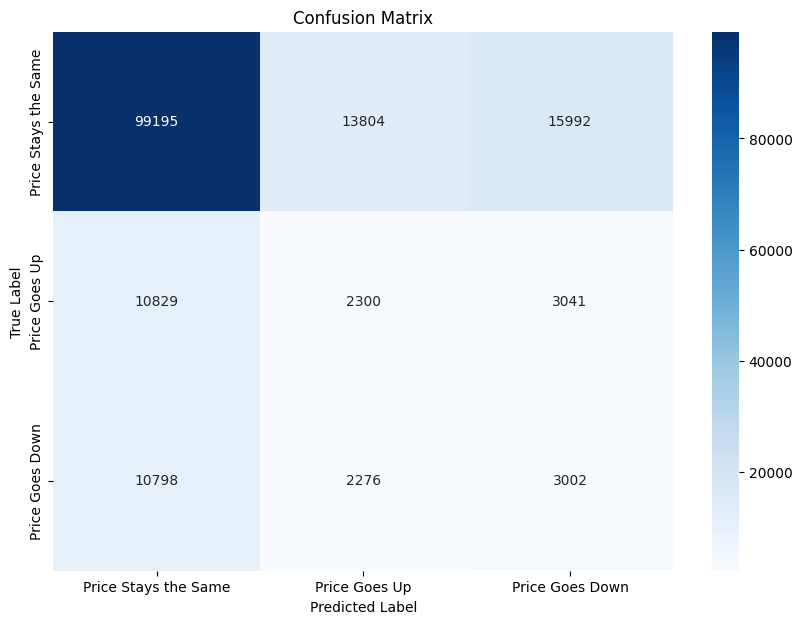

In [ ]:
# Plot confusion Matrix

classes = ["Price Stays the Same", "Price Goes Up", "Price Goes Down"]
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']


accuracy = history.history.get('accuracy')
val_accuracy = history.history.get('val_accuracy')

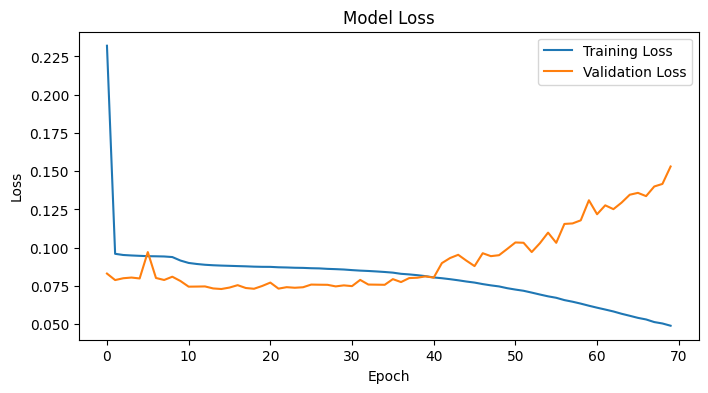

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

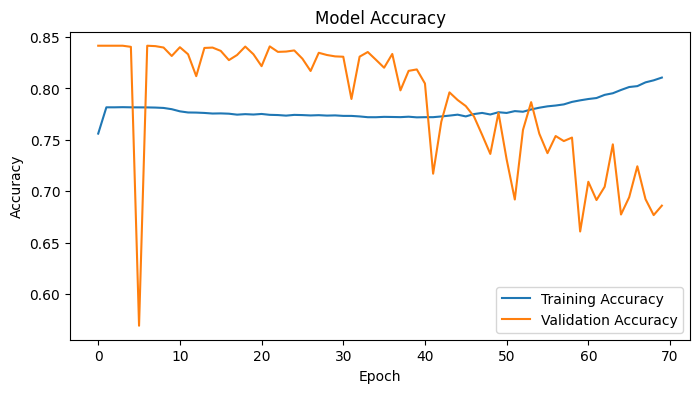

In [ ]:
if accuracy is not None:
    plt.figure(figsize=(8, 4))
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

## Model 8 ##

Focal Loss

Local positional encoding



In [ ]:
# Focal Loss Function
@tf.keras.utils.register_keras_serializable(package="CustomLoss")
class FocalLoss(tf.keras.losses.Loss):
    def __init__(self, gamma=2.0, alpha=None, **kwargs):
        super(FocalLoss, self).__init__(**kwargs)
        self.gamma = gamma
        if alpha is None:
            alpha = [1.0]
        # Convert alpha to a constant tensor.
        self.alpha = tf.constant(alpha, dtype=tf.float32)

    def call(self, y_true, y_pred):
        # Ensure y_true is integer and remove extra dimensions.
        y_true = tf.cast(tf.squeeze(y_true), tf.int32)
        num_classes = tf.shape(y_pred)[-1]
        y_true_one_hot = tf.one_hot(y_true, depth=num_classes)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1.0 - epsilon)
        p_t = tf.reduce_sum(y_true_one_hot * y_pred, axis=-1)
        alpha_factor = tf.reduce_sum(y_true_one_hot * self.alpha, axis=-1)
        ce_loss = -tf.math.log(p_t)
        focal_weight = alpha_factor * tf.pow(1 - p_t, self.gamma)
        loss = focal_weight * ce_loss
        loss = tf.reshape(loss, [-1])
        return loss

    def get_config(self):
        config = super(FocalLoss, self).get_config()
        # Save alpha as a list so it can be re-created during deserialization.
        config.update({
            "gamma": self.gamma,
            "alpha": self.alpha.numpy().tolist()
        })
        return config


In [ ]:
# =============================================================================
# Local Positional Encoding Layer
# =============================================================================
class LocalPositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        self.seq_length = kwargs.pop('seq_length')
        self.d_model = kwargs.pop('d_model')
        self.kernel_size = kwargs.pop('kernel_size', 7)
        super(LocalPositionalEncoding, self).__init__(**kwargs)
        self.conv = tf.keras.layers.Conv1D(
            filters=self.d_model,
            kernel_size=self.kernel_size,
            padding='same',
            activation='relu'
        )

    def build(self, input_shape):
        self.pos_embedding = self.add_weight(
            name="pos_embedding",
            shape=(self.seq_length, self.d_model),
            initializer=tf.keras.initializers.RandomNormal(stddev=0.06),
            trainable=True
        )
        super(LocalPositionalEncoding, self).build(input_shape)

    def call(self, inputs):
        pos_emb_expanded = tf.expand_dims(self.pos_embedding, axis=0)
        local_pos = self.conv(pos_emb_expanded)
        return inputs + local_pos

    def get_config(self):
        config = super(LocalPositionalEncoding, self).get_config()
        config.update({
            'seq_length': self.seq_length,
            'd_model': self.d_model,
            'kernel_size': self.kernel_size
        })
        return config


# =============================================================================
# Transformer Encoder Layer
# =============================================================================
def transformer_encoder(inputs, num_heads, ff_dim):
    # Pre-norm: normalize before the attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    # Multi-head self-attention with residual connection
    attn_output, attention_weights = tf.keras.layers.MultiHeadAttention(
        num_heads=num_heads,
        key_dim=inputs.shape[-1]
    )(x, x, return_attention_scores=True)
    attn_output = Dropout(0.1)(attn_output)
    x = attn_output + inputs

    # Simplified Feed-forward network with a residual connection
    y = LayerNormalization(epsilon=1e-6)(x)
    y = Dense(ff_dim, activation="relu", kernel_initializer='he_normal')(y)
    y = Dense(inputs.shape[-1], kernel_initializer='he_normal')(y)
    y = Dropout(0.2)(y)
    return x + y, attention_weights

# =============================================================================
# Build Model
# =============================================================================
def build_train_model(seq_length, feature_dim, num_heads, ff_dim, num_classes, num_layers=2):
    """
    Build a transformer model for time series classification.
    Inputs: historical prices (e.g., OHLC)
    Output: softmax over 3 classes (0: no move, 1: up, 2: down)
    """
    inputs = Input(shape=(seq_length, feature_dim))

    # Introduce non-linearity and expand feature dimension with Dense layers.
    x = Dense(feature_dim * 8, activation="relu", kernel_initializer='he_normal')(inputs)
    x = Dense(feature_dim * 16, activation="relu", kernel_initializer='he_normal')(x)

    # Incorporate local positional encoding
    x = LocalPositionalEncoding(seq_length=seq_length, d_model=feature_dim * 16, kernel_size=3)(x)


    # Stack transformer encoder layers
    for _ in range(num_layers):
        x, _ = transformer_encoder(x, num_heads, ff_dim)

    # Global average pooling to produce a fixed-size output vector.
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(num_classes, activation="softmax", kernel_initializer='he_normal')(x)
    model = Model(inputs, outputs)
    return model

# =============================================================================
# Build, compile, and summarize the model
# =============================================================================
train_model = build_train_model(
    seq_length=72,
    feature_dim=4,     # For OHLC data
    num_heads=4,
    ff_dim=256,
    num_classes=3,
    num_layers=6
)

train_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=FocalLoss(gamma=2.0, alpha=[0.28, 0.36, 0.36]),
    metrics=["accuracy"]
)

train_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 75, 4)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_60 (Dense)          │ (None, 75, 32)         │            160 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_61 (Dense)          │ (None, 75, 64)         │          2,112 │ dense_60[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ local_positional_encodin… │ (None, 75, 64)         │         17,152 │ dense_61[0][0]         │
│ (LocalPositionalEncoding) │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_48    │ (None, 75, 64)         │            128 │ local_positional_enco… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_24   │ [(None, 75, 64),       │         66,368 │ layer_normalization_4… │
│ (MultiHeadAttention)      │ (None, 4, 75, 75)]     │                │ layer_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_73 (Dropout)      │ (None, 75, 64)         │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_48 (Add)              │ (None, 75, 64)         │              0 │ dropout_73[0][0],      │
│                           │                        │                │ local_positional_enco… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_49    │ (None, 75, 64)         │            128 │ add_48[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_62 (Dense)          │ (None, 75, 256)        │         16,640 │ layer_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_63 (Dense)          │ (None, 75, 64)         │         16,448 │ dense_62[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_74 (Dropout)      │ (None, 75, 64)         │              0 │ dense_63[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_49 (Add)              │ (None, 75, 64)         │              0 │ add_48[0][0],          │
│                           │                        │                │ dropout_74[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_50    │ (None, 75, 64)         │            128 │ add_49[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_25   │ [(None, 75, 64),       │         66,368 │ layer_normalization_5… │
│ (MultiHeadAttention)      │ (None, 4, 75, 75)]     │                │ layer_normalization_5… │
├──────────────────────

 Total params: 617,891 (2.36 MB)

 Trainable params: 617,891 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model with the early stopping callback
history = train_model.fit(
    X_train_combined,
    y_train_combined,
    validation_data=(X_val_combined, y_val_combined),
    epochs=20,
    batch_size=32,

)

Epoch 1/20
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 50s 10ms/step - accuracy: 0.7741 - loss: 0.0506 - val_accuracy: 0.8228 - val_loss: 0.0583
Epoch 2/20
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 49s 10ms/step - accuracy: 0.7754 - loss: 0.0498 - val_accuracy: 0.7600 - val_loss: 0.0627
Epoch 3/20
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 53s 10ms/step - accuracy: 0.7746 - loss: 0.0493 - val_accuracy: 0.8000 - val_loss: 0.0620
Epoch 4/20
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 54s 11ms/step - accuracy: 0.7772 - loss: 0.0485 - val_accuracy: 0.7701 - val_loss: 0.0640
Epoch 5/20
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 51s 10ms/step - accuracy: 0.7760 - loss: 0.0479 - val_accuracy: 0.7606 - val_loss: 0.0629
Epoch 6/20
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 53s 10ms/step - accuracy: 0.7767 - loss: 0.0474 - val_accuracy: 0.7746 - val_loss: 0.0630
Epoch 7/20
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 54s 11ms/step - accuracy: 0.7781 - loss: 0.0463 - val_accuracy: 0.7676 - val_loss: 0.0686
Epoch 8/20
5039/5039 ━━━━━━━━━━━━━━━━━━━━ 51s 10ms/step - accuracy: 0.7766 -

In [ ]:
# Save the model
train_model.save('/content/drive/MyDrive/MSc-M60-Model-8.keras')

In [ ]:
# Provide the custom objects that the model needs.
custom_objects = {
    'LocalPositionalEncoding': LocalPositionalEncoding,
    'focal_loss': FocalLoss
}

# Load the model
model = load_model('/content/drive/MyDrive/MSc-M60-Model-8.keras', custom_objects=custom_objects)


In [ ]:
model = train_model

In [ ]:
# Test Accuracy
test_loss, test_acc = model.evaluate(X_test_combined, y_test_combined)
print(f"Test Accuracy: {test_acc}")

5039/5039 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.6625 - loss: 0.1080
Test Accuracy: 0.6736791133880615


In [ ]:
# Getting probabilities on test set
probabilities = model.predict(X_test_combined)

# Convert probabilistic predictions to class labels
predictions = np.argmax(probabilities, axis=1)

5039/5039 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step


In [ ]:
# Class predictions
unique_predictions, prediction_counts = np.unique(predictions, return_counts=True)
prediction_distribution = dict(zip(unique_predictions, prediction_counts))
print(prediction_distribution)

{0: 126776, 1: 18479, 2: 15982}


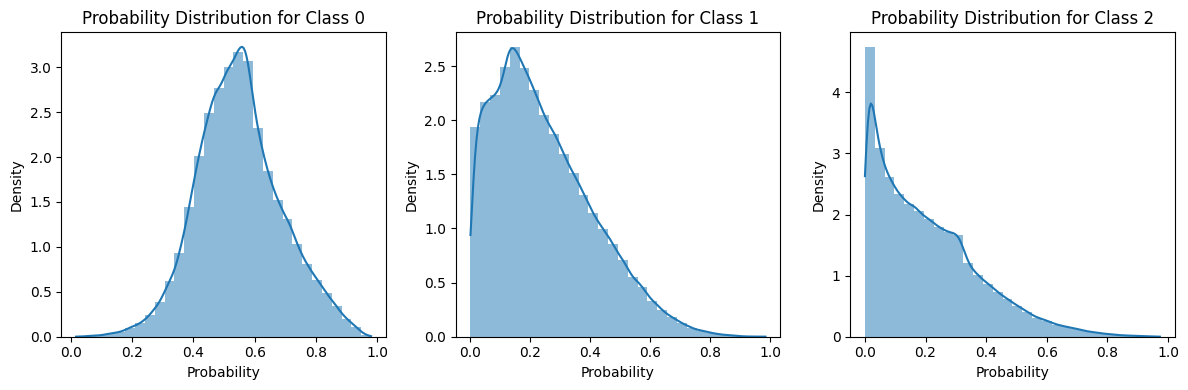

In [ ]:
# Probability distribution of class predictions
class_labels = ['Class 0', 'Class 1', 'Class 2']  # Names of the classes

plt.figure(figsize=(12, 4))
for i, class_label in enumerate(class_labels):
    plt.subplot(1, 3, i + 1)  # Create a subplot for each class
    sns.histplot(probabilities[:, i], bins=30, kde=True, stat="density", linewidth=0)
    plt.title(f'Probability Distribution for {class_label}')
    plt.xlabel('Probability')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()


In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_combined, predictions)

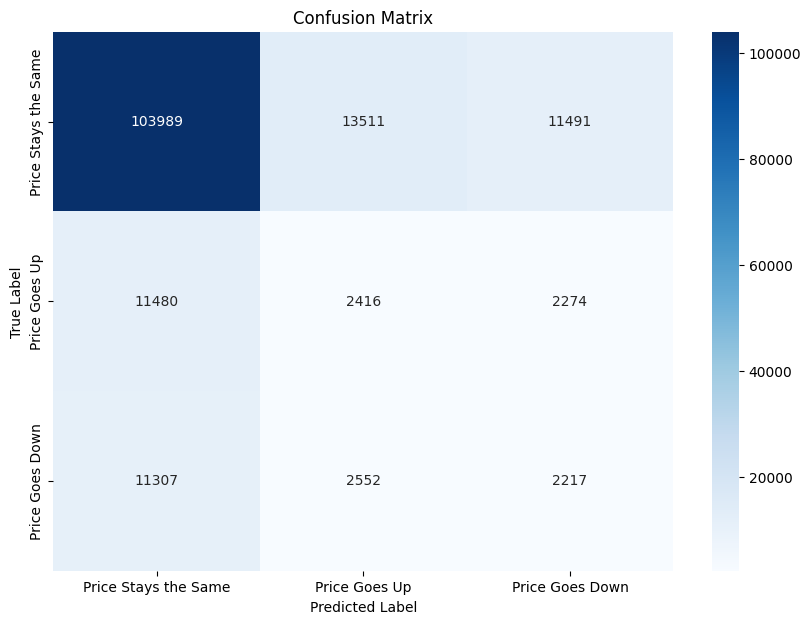

In [ ]:
# Plot confusion Matrix

classes = ["Price Stays the Same", "Price Goes Up", "Price Goes Down"]
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']


accuracy = history.history.get('accuracy')
val_accuracy = history.history.get('val_accuracy')

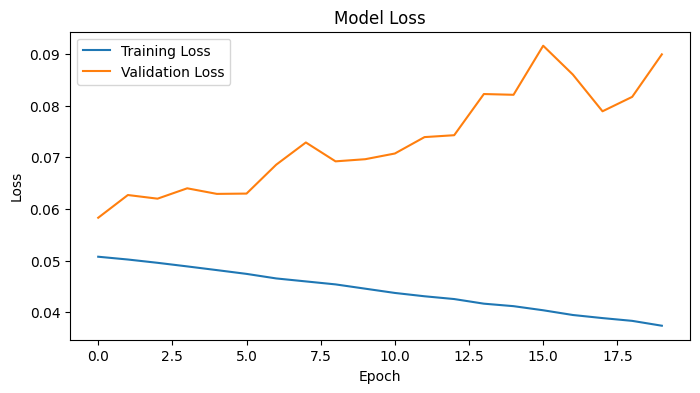

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

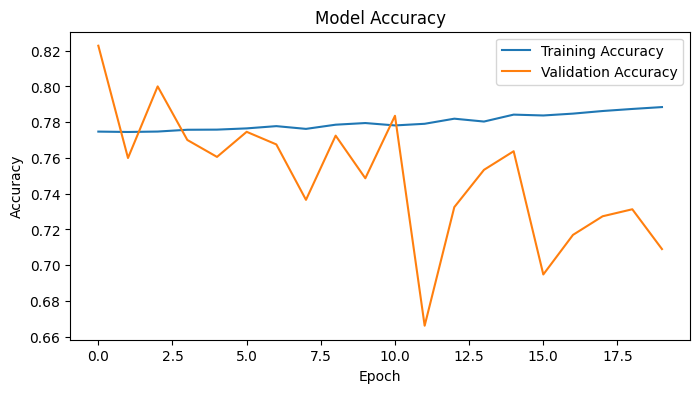

In [ ]:
if accuracy is not None:
    plt.figure(figsize=(8, 4))
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

## Making predictions from Model 2 ##

In [ ]:
# Getting probabilities on test set
probabilities = model.predict(X_test_6)

# Convert probabilistic predictions to class labels
predictions = np.argmax(probabilities, axis=1)

843/843 ━━━━━━━━━━━━━━━━━━━━ 152s 180ms/step


In [ ]:
# Create a new column in the original DataFrame for predictions
data_6['Predictions'] = np.nan

# The index where test predictions should start
start_index = 71 + len(train_data_6) + len(val_data_6)

# Append predictions to the original dataset at the correct indices
data_6.iloc[start_index:start_index+len(predictions), data_6.columns.get_loc('Predictions')] = predictions


In [ ]:
data_6.tail(10)

,Date,Open,High,Low,Close,Volume,cum_max_move,Label,Predictions
67560,2023-12-29 07:00:00,141.544006,141.559006,141.382996,141.475006,0,-0.448843,0,0.0
67561,2023-12-29 08:00:00,141.473999,141.880997,141.445007,141.832001,0,-0.699419,2,0.0
67562,2023-12-29 09:00:00,141.830994,141.832001,141.473999,141.494003,0,-0.462210,0,0.0
67563,2023-12-29 10:00:00,141.494003,141.494003,140.895996,140.994995,0,-0.109933,0,0.0
67564,2023-12-29 11:00:00,140.998993,141.104004,140.820007,140.914993,0,0.075932,0,0.0
67565,2023-12-29 12:00:00,140.914993,140.977997,140.796997,140.839996,0,0.129225,0,0.0
67566,2023-12-29 13:00:00,140.839005,141.074005,140.837997,140.917999,0,0.073802,0,0.0
67567,2023-12-29 14:00:00,140.919006,141.080002,140.891998,141.022003,0,-0.031201,0,0.0
67568,2023-12-29 15:00:00,141.022003,141.048996,140.949997,140.977997,0,0.001419,0,0.0
67569,2023-12-29 16:00:00,140.979004,141.082001,140.979004,140.979996,0,NaN,0,0.0


In [ ]:
# Drop rows with missing values in the 'Predictions' column
data_6_cleaned = data_6.dropna(subset=['Predictions'])

# Save the cleaned dataset to a new CSV file
data_6_cleaned.to_csv('/content/drive/MyDrive/MSc Dissertation Data/M60_usd_jpy_predicted_model22.csv', index=False)


## XGBoost Model ##

In [ ]:
# 1) Flatten sequences into 2D arrays
#    from (n_samples, n_steps,  n_features)
#    to   (n_samples, n_steps*n_features)
X_train = X_train_combined.reshape(X_train_combined.shape[0], -1)
X_val   = X_val_combined.reshape(  X_val_combined.shape[0],   -1)
X_test  = X_test_combined.reshape( X_test_combined.shape[0],  -1)

y_train = y_train_combined
y_val   = y_val_combined
y_test  = y_test_combined





In [ ]:
# 1) define your manual class weights
class_weights = {
    0: 1.0,   # “no move” samples get weight 1.0
    1: 2.75,   # “big up” samples get weight 3.75
    2: 2.75    # “big down” samples get weight 3.75
}

# 2) make a sample‐weight array by mapping each y_train to its weight
sample_weights = np.array([class_weights[int(y)] for y in y_train])

# 3) build DMatrix with those weights
dtrain = xgb.DMatrix(X_train, label=y_train, weight=sample_weights)
dval   = xgb.DMatrix(X_val,   label=y_val)  # no need to weight validation

# 4) train as before
params = {
    'objective':        'multi:softprob',
    'num_class':        3,
    'eval_metric':      'mlogloss',
    'max_depth':        6,
    'eta':              0.1,
    'subsample':        0.8,
    'colsample_bytree': 0.8,
    'seed':             42,
}

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=[(dval, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=True
)




[0]	validation-mlogloss:1.06113
[1]	validation-mlogloss:1.02798
[2]	validation-mlogloss:0.99870
[3]	validation-mlogloss:0.97232
[4]	validation-mlogloss:0.94869
[5]	validation-mlogloss:0.92763
[6]	validation-mlogloss:0.90867
[7]	validation-mlogloss:0.89133
[8]	validation-mlogloss:0.87585
[9]	validation-mlogloss:0.86204
[10]	validation-mlogloss:0.84970
[11]	validation-mlogloss:0.83835
[12]	validation-mlogloss:0.82789
[13]	validation-mlogloss:0.81845
[14]	validation-mlogloss:0.80949
[15]	validation-mlogloss:0.80171
[16]	validation-mlogloss:0.79442
[17]	validation-mlogloss:0.78828
[18]	validation-mlogloss:0.78256
[19]	validation-mlogloss:0.77712
[20]	validation-mlogloss:0.77237
[21]	validation-mlogloss:0.76796
[22]	validation-mlogloss:0.76414
[23]	validation-mlogloss:0.76047
[24]	validation-mlogloss:0.75718
[25]	validation-mlogloss:0.75405
[26]	validation-mlogloss:0.75105
[27]	validation-mlogloss:0.74846
[28]	validation-mlogloss:0.74606
[29]	validation-mlogloss:0.74352
[30]	validation-mlog

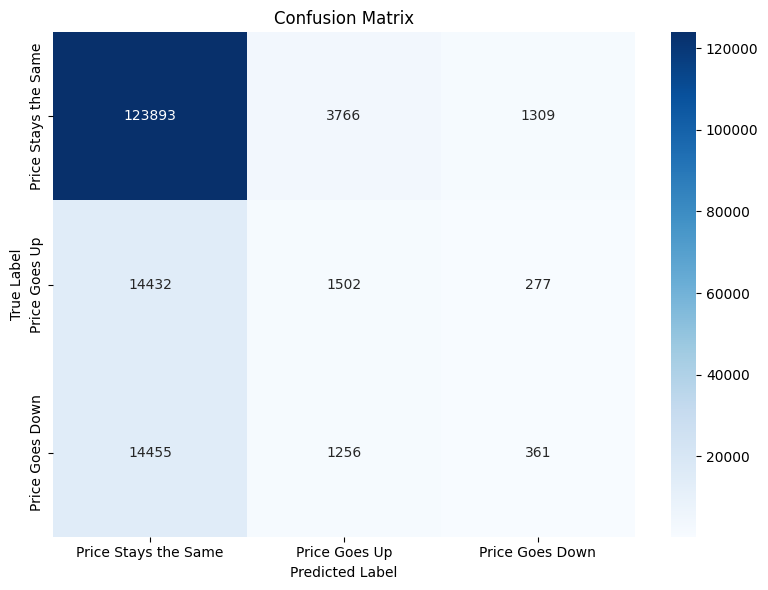

In [ ]:
# 1) Prepare the test DMatrix
dtest = xgb.DMatrix(X_test, label=y_test)

# 2) Get predicted probabilities and then the predicted class
y_proba = bst.predict(dtest)           # shape = (n_samples, 3)
y_pred  = np.argmax(y_proba, axis=1)   # choose the class with highest prob


# 4) Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 5) Plot the confusion matrix
classes = ["Price Stays the Same", "Price Goes Up", "Price Goes Down"]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()





In [ ]:
X_test  = X_test_6.reshape( X_test_6.shape[0],  -1)
y_test  = y_test_6

In [ ]:
# 1) Prepare the test DMatrix
dtest = xgb.DMatrix(X_test, label=y_test)

# Getting probabilities on test set
probabilities = bst.predict(dtest)

# Convert probabilistic predictions to class labels
predictions = np.argmax(probabilities, axis=1)

In [ ]:
# Create a new column in the original DataFrame for predictions
data_6['Predictions'] = np.nan

# The index where test predictions should start
start_index = 71 + len(train_data_6) + len(val_data_6)

# Append predictions to the original dataset at the correct indices
data_6.iloc[start_index:start_index+len(predictions), data_6.columns.get_loc('Predictions')] = predictions

In [ ]:
# Drop rows with missing values in the 'Predictions' column
data_6_cleaned = data_6.dropna(subset=['Predictions'])

# Save the cleaned dataset to a new CSV file
data_6_cleaned.to_csv('/content/drive/MyDrive/MSc Dissertation Data/M60_usd_jpy_predicted_XGBoost.csv', index=False)

## Activity vs Accuracy plot ##

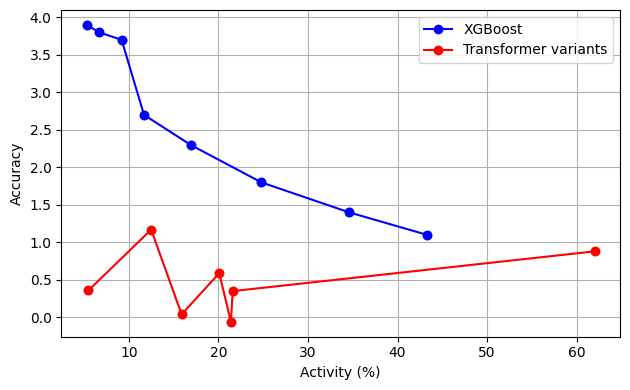

In [ ]:
# Provided data
activity_XGB = [5.3, 6.7, 9.2, 11.7, 16.9, 24.8, 34.6, 43.3]
accuracy_XGB = [3.9, 3.8, 3.7, 2.7, 2.3, 1.8, 1.4, 1.1]

activity_Transformer = [5.5, 12.5, 15.9, 20.1, 21.4, 21.6, 62]
accuracy_Transformer = [0.36, 1.17, 0.04, 0.59, -0.06, 0.35, 0.88]

# Plotting
plt.figure(figsize=(6.4, 4))
plt.scatter(activity_XGB, accuracy_XGB)
plt.plot(activity_XGB, accuracy_XGB, linestyle='-', marker='o', color='blue', label='XGBoost')
plt.scatter(activity_Transformer, accuracy_Transformer)
plt.plot(activity_Transformer, accuracy_Transformer, linestyle='-', marker='o', color='red', label='Transformer variants')

# Labels and title
plt.xlabel('Activity (%)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()


## Train-Validation-Test split plot ##

In [ ]:
data_EUR = pd.read_csv('/content/drive/MyDrive/Experiment FX-trading/EURUSD=X.csv')


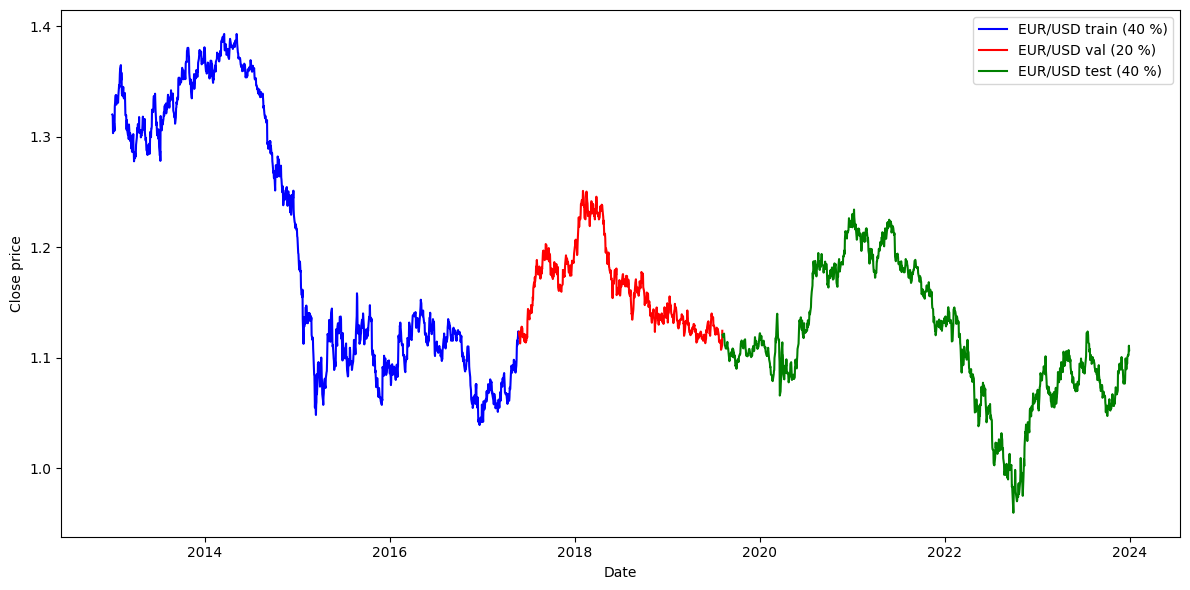

In [ ]:
# ---------------------------------------------------------------
# 1  DataFrames in a dict  (add more pairs as needed)
# ---------------------------------------------------------------
pairs = {
    'EUR/USD': data_EUR,
}

# ---------------------------------------------------------------
# 2  Date window to keep
# ---------------------------------------------------------------
start, end = '2013-01-01', '2023-12-31'

# ---------------------------------------------------------------
# 3  Plot
# ---------------------------------------------------------------
plt.figure(figsize=(12, 6))

for label, df in pairs.items():
    # ensure datetime dtype
    df['Date'] = pd.to_datetime(df['Date'])

    # keep only the chosen window
    mask        = (df['Date'] >= start) & (df['Date'] <= end)
    slice_frame = df.loc[mask, ['Date', 'Close']].sort_values('Date')

    # find split indices
    n     = len(slice_frame)
    i40   = int(0.40 * n)          # end of first 40 %
    i60   = int(0.60 * n)          # end of first 60 % (i.e. 40 %+20 %)

    # plot the three segments in their colours
    plt.plot(slice_frame['Date'].iloc[:i40],
             slice_frame['Close'].iloc[:i40],
             color='blue',
             label=f'{label} train (40 %)')

    plt.plot(slice_frame['Date'].iloc[i40:i60],
             slice_frame['Close'].iloc[i40:i60],
             color='red',
             label=f'{label} val (20 %)')

    plt.plot(slice_frame['Date'].iloc[i60:],
             slice_frame['Close'].iloc[i60:],
             color='green',
             label=f'{label} test (40 %)')


plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend()
plt.tight_layout()
plt.show()
